\begin{equation}
\textbf{Trajectory generation via Sequential Convex Programming (SCVx and GuSTO)}
\end{equation}
\begin{equation}
\text{MSc. Franklin Ticona}
\end{equation}
\begin{equation}
\text{CubeSat Bolivia}
\end{equation}

<center><img src="https://media1.tenor.com/m/CwEI_MIV8fEAAAAd/hello-panda.gif" width="300"></center>


Este cuaderno pretende resolver el siguiente problema de planeación de trayectoria para un dron utilizando Programación Secuencial Convexa:
\begin{align*}
    \text{min} \quad &\int_{0}^{t_f}||\textbf{a}(t)||_2^2dt\\
    \text{s.t.}\quad
    &\ddot{\textbf{r}}(t)=\textbf{a}(t)-g\begin{bmatrix}
        0\\
        0\\
        1
    \end{bmatrix}\\
    &||\textbf{a}(t)||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}(0)=\textbf{r}_\text{init},\quad\dot{\textbf{r}}(0)=\textbf{v}_\text{init}\\
    &\textbf{r}(t_f)=\textbf{r}_\text{final},\quad\dot{\textbf{r}}(t_f)=\textbf{v}_\text{final}\\
    &||\textbf{r}(t)-\textbf{c}_j||_2\geq d_{obs},\quad j=1,\dots,n_\text{obs}
\end{align*}

Diagrama cinemático:
<center><img src="https://i.ibb.co/jLPrB7z/dron.png" width="600"></center>


Considerando que el modelo matemático del dron es gobernado por la 2da ley de Newton:

\begin{equation*}
m\cdot\frac{{}^\mathcal{N}d}{dt}\textbf{v}=\sum{}^\mathcal{N}\textbf{F}
\end{equation*}

\begin{equation*}
m\ddot{\textbf{r}}(t)=\textbf{F}-\begin{bmatrix}
0\\
0\\
mg
\end{bmatrix}
\end{equation*}
Simplificando el valor de la masa:
\begin{equation*}
\ddot{\textbf{r}}(t)=\textbf{a}-\begin{bmatrix}
0\\
0\\
g
\end{bmatrix}
\end{equation*}



La representación en su espacio de estados está dada por:
\begin{equation*}
    \begin{bmatrix}
		\ddot{x}\\
		\ddot{y}\\
		\ddot{z}\\
		\dot{x}\\
		\dot{y}\\
		\dot{z}\\
	\end{bmatrix}=
	\begin{bmatrix}
		0&0&0&0&0&0\\
		0&0&0&0&0&0\\
		0&0&0&0&0&0\\
		1&0&0&0&0&0\\
		0&1&0&0&0&0\\
		0&0&1&0&0&0
	\end{bmatrix}
	\begin{bmatrix}
		\dot{x}\\
		\dot{y}\\
		\dot{z}\\
		x\\
		y\\
		z\\
	\end{bmatrix}+
	\begin{bmatrix}
		1&0&0\\
		0&1&0\\
		0&0&1\\
		0&0&0\\
		0&0&0\\
		0&0&0
	\end{bmatrix}
	\begin{bmatrix}
		a_x\\
		a_y\\
		a_z-g
	\end{bmatrix}
\end{equation*}

De esta manera:

\begin{equation}
\textbf{A}(t)=\begin{bmatrix}
		0&0&0&0&0&0\\
		0&0&0&0&0&0\\
		0&0&0&0&0&0\\
		1&0&0&0&0&0\\
		0&1&0&0&0&0\\
		0&0&1&0&0&0
	\end{bmatrix},\quad \textbf{B}(t)=\begin{bmatrix}
		1&0&0\\
		0&1&0\\
		0&0&1\\
		0&0&0\\
		0&0&0\\
		0&0&0
	\end{bmatrix}
\end{equation}

\begin{equation}
\dot{\textbf{x}}=\textbf{A}\textbf{x}+\textbf{B}\textbf{a}+\begin{bmatrix}
0\\
0\\
-g\\
0\\
0\\
0
\end{bmatrix}
\end{equation}

# Discretización

## Discretización de la integral

La integral:

\begin{equation}
\int_{0}^{t_f}||\textbf{a}(t)||_2^2dt
\end{equation}

Puede ser aproximada mediante sumas de Riemman:

\begin{equation}
\int_{0}^{t_f}||\textbf{a}(t)||_2^2dt≈\sum_{i=0}^{T}\tau\cdot ||\textbf{a}_i||^2=\tau\sum_{i=0}^{T}\cdot ||\textbf{a}_i||^2
\end{equation}
Notemos que:

\begin{equation}
\textbf{a}_i≜\textbf{a}(\tau\cdot i)
\end{equation}

## Discretización de espacio de estados

Sea el sistema general Lineal de Tiempo Variable:

\begin{equation}
    \dot{\textbf{x}}(t)=\textbf{A}(t)\textbf{x}(t)+\textbf{B}(t)\textbf{u}(t)
\end{equation}

Para un intervalo de tiempo $t \in [t_k,t_{k+1}]$, la solución exacta para $\textbf{x}$ está dada por:

\begin{equation}
    \textbf{x}(t)=\Phi(t,t_k)\textbf{x}(t_k)+\int_{t_k}^{t}\Phi(t,\xi)\textbf{B}(\xi)\textbf{u}(\xi)d\xi
\end{equation}

Suponiendo que $\textbf{A}(t)$ y $\textbf{B}(t)$ son matrices constantes y una condición de sujeción de orden cero, lo cual implica que $\textbf{u}(t_k)$ es constante en el intervalo $[t_k,t_{k+1}]$. Por lo tanto, la solución evaluada en $t_{k+1}$ se convierte en:

\begin{equation}
    \textbf{x}(t_{k+1})=e^{\textbf{A}(t_{k+1}-t_k)}\textbf{x}(t_k)+\Bigg( \int_{0}^{t_{k+1}-t_k}e^{\textbf{A}(t_{k+1}-t_k-\xi)}d\xi\Bigg) \textbf{B}\textbf{u}(t_k)
\end{equation}

Denotando $\tau\triangleq t_{k+1}-t_k$ y resolviendo la integral:

\begin{equation}
    \textbf{x}(t_{k+1})=e^{\textbf{A}\tau}\textbf{x}(t_k)+\textbf{A}^{-1}(e^{\textbf{A}\tau}-[I]) \textbf{B}\textbf{u}(t_k)
\end{equation}

Tomando los dos primeros términos de la serie de Taylor:

\begin{equation}
e^{\textbf{A}\tau}=\sum_{k=0}^{\infty}\frac{1}{k!}(\textbf{A}\tau)^k
\end{equation}

Por lo tanto:

\begin{equation}
    \textbf{x}(t_{k+1})=([I]+\tau\textbf{A})\textbf{x}(t_k)+\tau\textbf{B}\textbf{u}(t_k)
\end{equation}

Para simplificar la notación, se define:

\begin{equation*}
\textbf{x}_{j}\triangleq\textbf{x}(t_{j}),\quad\textbf{A}_d\triangleq[I]+\tau\textbf{A},\quad\textbf{B}_d\triangleq\tau\textbf{B}
\end{equation*}

Por lo tanto, el modelo discretizado se expresa de la siguiente manera:

\begin{equation}
    \textbf{x}_{k+1}=\textbf{f}(\textbf{x}_k,\textbf{u}_k)=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k
\end{equation}
$\textbf{Nota:}$ Si los elementos de $\textbf{A}$ son grandes o si $\tau$ es grande, será mas preciso considerar mas términos de la serie de Taylor de $e^{\textbf{A}\tau}$.

## Problema de optimización discreto

\begin{align*}
    \text{min} \quad &\tau\sum_{i=0}^{T}\cdot ||\textbf{a}_i||^2\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k+\tau\begin{bmatrix}
0&0&-g&0&0&0
\end{bmatrix}^T\\
    &||\textbf{a}_i||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}\\
    &||\textbf{r}_k-\textbf{c}_j||_2\geq d_{obs},\quad j=1,\dots,n_\text{obs}
\end{align*}

$\textbf{Nota:}$ Este NO ES un problema de optimización convexo debido a que en la restricción:

\begin{equation}
-||\textbf{r}_k-\textbf{c}_j||_2+d_{obs}\leq 0
\end{equation}

La función $-||\textbf{r}_i-\textbf{c}_j||_2+d_{obs}$ no es convexa. De hecho, es cóncava.

# Convexificación

Definamos la función $g$ que representa la restricción no convexa:

\begin{equation}
    \lVert \textbf{r}_k-\textbf{c}_j \rVert\geq d_{j}
\end{equation}

\begin{equation}
     g(\textbf{r}_k)=-\lVert \textbf{r}_k-\textbf{c}_j \rVert+d_{j}\leq 0
\end{equation}

Notemos que si empleamos la aproximación de Taylor de 1er orden, en la desigualdad:

\begin{equation}
     \tilde{g}(\textbf{r}_k)\leq 0
\end{equation}

La función $\tilde{g}$ es convexa, pues es una recta. Además:

\begin{equation}
     \tilde{g}(\textbf{r}_k)=g(\bar{\textbf{r}}_k)+\nabla g(\bar{\textbf{r}}_k)^T\left(
         \textbf{r}_k-\bar{\textbf{r}}_j\right)
\end{equation}

Donde:

\begin{equation}
g(\textbf{r}_k)=-\lVert \textbf{r}_k-\textbf{c}_j \rVert+d_{j}
\end{equation}

\begin{equation}
\nabla g(\textbf{r}_k)=-\frac{\left(
\textbf{r}_k-\textbf{c}_j
\right) }{\lVert\textbf{r}_k-\textbf{c}_j\rVert}
\end{equation}

$\textbf{Nota 1}$: La expresión linealizada se vería de la siguiente manera:

\begin{equation}
-\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert -
\frac{\left(
\bar{\textbf{r}}_k-\textbf{c}_j
\right)^T }{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert} \cdot
\left(\textbf{r}_k-\bar{\textbf{r}}_j\right)+d_{j}\leq 0
\end{equation}


$\textbf{Nota 2}$: La desigualdad puede escribirse como una recta respecto a $\textbf{r}_i$ cuyos coeficientes son:

\begin{equation}
\textbf{a}_k^T\textbf{r}_k+b_k+d_{j}\leq 0
\end{equation}

Donde:

\begin{equation}
\textbf{a}_k=-\frac{\left(
\bar{\textbf{r}}_k-\textbf{c}_j
\right)}{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert}
\end{equation}

\begin{equation}
b_k=-\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert +
\frac{\left(
\bar{\textbf{r}}_k-\textbf{c}_j
\right)^T }{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert} \cdot
\bar{\textbf{r}}_j
\end{equation}

Esta formulación es importante para que el problema sea compilante según las reglas DPP (Disciplined Parametrized Programming), pero esto va un poco más allá de este taller.

# Penalized Trust Region (PTR)

Un método simple ampliamente utilizado en la literatura para resolver el problema de programación secuencial convexa es PTR. En resumen, el problema de optimización previo, se reformula como sigue:

\begin{align*}
    \text{min} \quad &\tau\sum_{i=0}^{T}\cdot ||\textbf{a}_k||^2+\sum_{i=0}^{T+1}\Bigg({w}_{tr}\|({\textbf{x}}_k - \bar{\textbf{x}}_k)\|^2 + w_{vc} \|{\textbf{v}}_k^c\|_1+w_{vb} v_k^b\Bigg)\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k+\textbf{v}_k^c\\
    &||\textbf{a}_k||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}\\
    &-\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert -\frac{\left(\bar{\textbf{r}}_k-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert} \cdot\left(\textbf{r}_k-\bar{\textbf{r}}_j\right)+d_{j}-v_k^b\leq 0
\end{align*}

Notar que:
\begin{equation}
\textbf{x}_k=\begin{bmatrix}
\textbf{v}_k\\
\textbf{r}_k
\end{bmatrix},
\quad\bar{\textbf{x}}_k=\begin{bmatrix}
\bar{\textbf{v}}_k\\
\bar{\textbf{r}}_k
\end{bmatrix}
\end{equation}

# Algoritmo final

En esencia, la solución (trayectoria), se inicializa con algún método y se va actualizando con cada iteración en la cual se resuelve el problema de optimización convexo. Donde cada punto de linealización, viene dada por la trayectoria óptima anterior.

**Algoritmo: Programación Secuencial Convexa para generación de trayectoria del dron.**

- **Entrada:** $\bar{\textbf{x}}=\textbf{x}_\text{init}$
- **for** $j=1,\dots,K_{max}$:
    - Resolver el problema convexificado (solución óptima $\textbf{x}^*$):
    - \begin{align*}
    \text{min} \quad &\tau\sum_{i=0}^{T-1}\cdot ||\textbf{a}_i||^2+\sum_{i=0}^{T}\Bigg({w}_{tr}\|({\textbf{x}}_i - \bar{\textbf{x}}_i)\|^2 + w_{vc} \|{\textbf{v}}_i^c\|_1+w_{vb} v_i^b\Bigg)\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k+\textbf{v}_k^c\\
    &||\textbf{a}_i||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}\\
    &-\lVert\bar{\textbf{r}}_i-\textbf{c}_j\rVert -\frac{\left(\bar{\textbf{r}}_i-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}_i-\textbf{c}_j\rVert} \cdot\left(\textbf{r}_i-\bar{\textbf{r}}_j\right)+d_{j}-v_k^b\leq 0
\end{align*}
    - $\bar{\textbf{x}}=\textbf{x}^*$ actualización de linealización
- **Salida:** $\textbf{x}_\text{global}^*=\bar{\textbf{x}}$

# Código de ejemplo PTR

In [27]:
!pip install ecos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 10.0 MB/s eta 0:00:00


Librerías:

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

print("numpy version",np.__version__)
print("cvxpy version",cp.__version__)

T = 31-1 # 31-1 representa 31 puntos de discretización
tf = 10
tau = tf/(T)

numpy version 2.0.2
cvxpy version 1.6.7


Posición inicial y final (para los puntos intermedios se aplica una simple interpolación)

\begin{equation}
\textbf{x}_\text{init}=\begin{bmatrix}
0[m/s]\\
0[m/s]\\
0[m/s]\\
0[m]\\
-15[m]\\
10[m]
\end{bmatrix},\quad \textbf{x}_\text{final}=\begin{bmatrix}
0[m/s]\\
0[m/s]\\
0[m/s]\\
25[m]\\
25[m]\\
10[m]
\end{bmatrix}
\end{equation}

En el siguiente bloque, se define el problema de optimización mediante cvxpy (librería de optimización convexa desarrollada en Stanford):

\begin{align*}
    \text{min} \quad &\tau\sum_{i=0}^{T}\cdot ||\textbf{a}_k||^2+\sum_{i=0}^{T+1}\Bigg({w}_{tr}\|({\textbf{x}}_k - \bar{\textbf{x}}_k)\|^2 + w_{vc} \|{\textbf{v}}_k^c\|_1+w_{vb} v_k^b\Bigg)\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k+\textbf{v}_k^c\\
    &||\textbf{a}_k||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}\\
    &-\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert -\frac{\left(\bar{\textbf{r}}_k-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert} \cdot\left(\textbf{r}_k-\bar{\textbf{r}}_j\right)+d_{j}-v_k^b\leq 0
\end{align*}

In [2]:
nx = cp.Variable((6, T + 1), name='new_x')
a = cp.Variable((3, T), name='a')
vc = cp.Variable((6, T), name='vc')
vb1 = cp.Variable((T + 1, 1), name='vb1')
vb2 = cp.Variable((T + 1, 1), name='vb2')
vb3 = cp.Variable((T + 1, 1), name='vb3')

startpos_cvxpy = cp.Parameter((6,1), name='start_pos')
endpos_cvxpy = cp.Parameter((6,1), name='end_pos')

ox_aux = cp.Parameter((6,T + 1), name='ox_aux')
ox_cvxpy = cp.Parameter((6,T + 1), name='ox_cvxpy')

c_obs1 = cp.Parameter((3,1), name='c_obs1')
c_obs2 = cp.Parameter((3,1), name='c_obs2')
c_obs3 = cp.Parameter((3,1), name='c_obs3')

A_discrete = cp.Parameter((6,6), name='A_discrete')
B_discrete = cp.Parameter((6,3), name='B_discrete')
w_tr = cp.Parameter(name='w_tr')
w_vc = cp.Parameter(name='w_vc')
w_vb = cp.Parameter(name='w_vb')

d_obs1 = cp.Parameter(name='d_obs1')
d_obs2 = cp.Parameter(name='d_obs2')
d_obs3 = cp.Parameter(name='d_obs3')

a_max = cp.Parameter(name='a_max')
aux_g = cp.Parameter((6,1), name='aux_g')

constraints = [
    nx[:, 0] == startpos_cvxpy[:,0],
    nx[:, T] == endpos_cvxpy[:,0],
    a[:, 0] == 0, a[:, T-1] == 0, vb1>=0, vb2>=0, vb3>=0
]
cost = 0

for k in range(0, T + 1):
    cost +=cp.sum_squares(w_tr*nx[:,k]-ox_aux[:,k])

for k in range(0, T):
    constraints  += [nx[:, k+1] == A_discrete @ nx[:, k] + B_discrete @ (a[:, k])-tau*aux_g[:,0]+vc[:, k], cp.norm(a[:, k], 2) <= a_max]
    cost +=cp.norm(w_vc*vc[:,k],1)

for k in range(0, T+1):
    taylor_f_1 =-cp.norm(ox_cvxpy[3:6,k]-c_obs1[:,0],2)
    taylor_grad_1 = -(ox_cvxpy[3:6,k]-c_obs1[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs1[:,0],2))

    taylor_f_2 =-cp.norm(ox_cvxpy[3:6,k]-c_obs2[:,0],2)
    taylor_grad_2 = -(ox_cvxpy[3:6,k]-c_obs2[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs2[:,0],2))

    taylor_f_3 =-cp.norm(ox_cvxpy[3:6,k]-c_obs3[:,0],2)
    taylor_grad_3 = -(ox_cvxpy[3:6,k]-c_obs3[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs3[:,0],2))

    constraints  += [taylor_f_1+taylor_grad_1.T@(nx[3:6, k]-ox_cvxpy[3:6,k])-vb1[k,0]+d_obs1<=0]
    constraints  += [taylor_f_2+taylor_grad_2.T@(nx[3:6, k]-ox_cvxpy[3:6,k])-vb2[k,0]+d_obs2<=0]
    constraints  += [taylor_f_3+taylor_grad_3.T@(nx[3:6, k]-ox_cvxpy[3:6,k])-vb3[k,0]+d_obs3<=0]

objective = cp.Minimize(100*tau*cp.sum_squares(a)+cost+w_vb*(cp.sum(vb1)+cp.sum(vb2)+cp.sum(vb3)))
problem = cp.Problem(objective, constraints)

\begin{equation}
d_1=6[m],\quad d_2=3[m],\quad d_3=6[m]
\end{equation}
\begin{equation}
w_{tr}=0.5,\quad,w_{vc}=1000,\quad w_{vb}=5
\end{equation}
\begin{equation}
a_{max}=500[m/s^2]
\end{equation}

In [3]:
startpos=np.array([[0.0],[0.0],[0.0],[0],[-15],[10.0]])
endpos=np.array([[0.0],[0.0],[0.0],[25],[25],[20.0]]) #descoméntame 1

#endpos=np.array([[0.0],[0.0],[0.0],[25],[25],[10.0]]) #descoméntame 2

alpha1=1/4
alpha2=2/4
alpha3=3/4
c_obs1_double = np.array([[alpha1*25+(1-alpha1)*0+0.3],[alpha1*25+(1-alpha1)*(-15)+0.1],[10]])
c_obs2_double = np.array([[alpha2*25+(1-alpha2)*0-0.3],[alpha2*25+(1-alpha2)*(-15)-0.1],[15]]) #descoméntame 1
c_obs3_double = np.array([[alpha3*25+(1-alpha3)*0+0.2],[alpha3*25+(1-alpha3)*(-15)-0.2],[20]]) #descoméntame 1
#c_obs2_double = np.array([[alpha2*25+(1-alpha2)*0-0.3],[alpha2*25+(1-alpha2)*(-15)-0.1],[10]]) #descoméntame 2
#c_obs3_double = np.array([[alpha3*25+(1-alpha3)*0+0.2],[alpha3*25+(1-alpha3)*(-15)-0.2],[10]]) #descoméntame 2

print("c1:", c_obs1_double)
print("c2:",c_obs2_double)
print("c3:",c_obs3_double)

d_obs1_double = 6
d_obs2_double = 3
d_obs3_double = 6

w_tr_double=0.1
w_vc_double=10000
w_vb_double=5000

a_max_double = 25
g_double=9.81

ox_pos = np.column_stack((np.array([np.linspace(startpos[3,0], endpos[3,0], T+1), np.linspace(startpos[4,0], endpos[4,0], T+1),np.linspace(startpos[5,0], endpos[5,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T + 1):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau
ox=np.block([[ox_vel],[ox_pos]])

A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]])
B = np.vstack((np.eye(3), np.zeros((3, 3))))

A_discrete.value = np.eye(6)+tau*A
B_discrete.value = tau*B
aux_g.value = np.array([[0],[0],[9.81],[0],[0],[0]])
a_max.value = a_max_double

c1: [[ 6.55]
 [-4.9 ]
 [10.  ]]
c2: [[12.2]
 [ 4.9]
 [15. ]]
c3: [[18.95]
 [14.8 ]
 [20.  ]]


In [4]:
startpos_cvxpy.value=startpos
endpos_cvxpy.value=endpos

w_tr.value = w_tr_double
w_vc.value = w_vc_double
w_vb.value = w_vb_double

d_obs1.value = d_obs1_double
d_obs2.value = d_obs2_double
d_obs3.value = d_obs3_double

c_obs1.value = c_obs1_double
c_obs2.value = c_obs2_double
c_obs3.value = c_obs3_double

t0 = time.time()
Kmax_SCP=8

for i in range(Kmax_SCP):

    ox_cvxpy.value=np.copy(ox)
    ox_aux.value=np.copy(w_tr_double*ox)
    val=problem.solve(solver='ECOS')
    ox = np.copy(nx.value)

    print(" Iteration number: ",i," Cost function: ", val)
t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

a_value=a.value
nx_value=nx.value

/usr/local/lib/python3.12/dist-packages/cvxpy/reductions/solvers/solving_chain.py:241: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


 Iteration number:  0  Cost function:  120606.77071813442
 Iteration number:  1  Cost function:  111792.8346212776
 Iteration number:  2  Cost function:  109630.01026266163
 Iteration number:  3  Cost function:  108502.33016532463
 Iteration number:  4  Cost function:  107290.38453405253
 Iteration number:  5  Cost function:  106709.31687083842
 Iteration number:  6  Cost function:  106604.72459617643
 Iteration number:  7  Cost function:  106596.4107085978

CVXPY
Solve time: 11991.723 ms


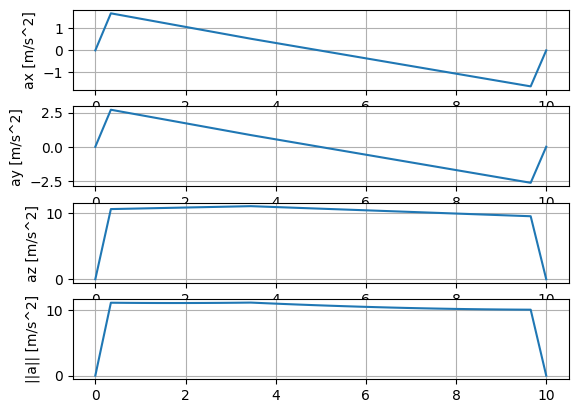

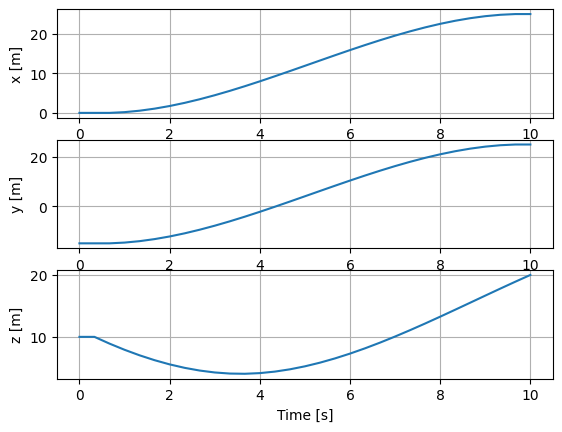

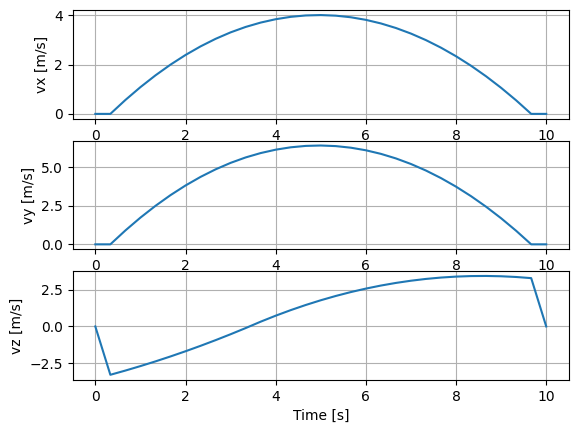

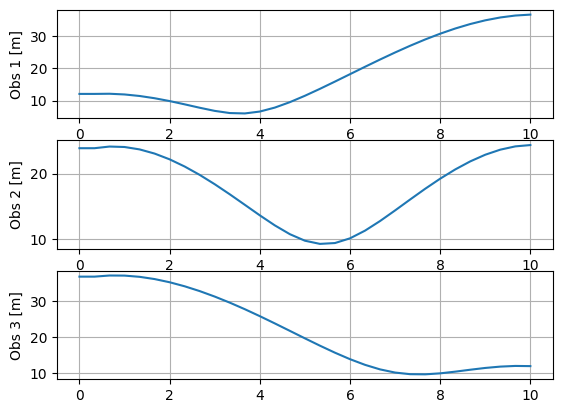

In [5]:
plt.figure(5)
plt.subplot(411)
plt.plot(np.linspace(0, tf, T), a_value[0,:])
plt.ylabel('ax [m/s^2]')
plt.grid(True)
plt.subplot(412)
plt.plot(np.linspace(0, tf, T), a_value[1,:])
plt.ylabel('ay [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(413)
plt.plot(np.linspace(0, tf, T), a_value[2,:])
plt.ylabel('az [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(414)
plt.plot(np.linspace(0, tf, T), np.linalg.norm(a_value,axis=0))
plt.ylabel('||a|| [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(6)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[3,:])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[4,:])
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[5,:])
plt.xlabel('Time [s]')
plt.ylabel('z [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

nx_value=nx.value
plt.figure(7)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[0,:])
plt.xlabel('Time [s]')
plt.ylabel('vx [m/s]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[1,:])
plt.xlabel('Time [s]')
plt.ylabel('vy [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[2,:])
plt.xlabel('Time [s]')
plt.ylabel('vz [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(8)
plt.subplot(311)
pos_dron= nx_value[3:6,:]
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs1_double,axis=0))
plt.ylabel('Obs 1 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs2_double,axis=0))
plt.ylabel('Obs 2 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs3_double,axis=0))
plt.ylabel('Obs 3 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.show()

In [6]:
import numpy as np
import plotly.graph_objs as go

def plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres):

    # Extracting trajectory data
    x_traj = nx_value[3,:]
    y_traj = nx_value[4,:]
    z_traj = nx_value[5,:]

    # Plotting the trajectory
    trace_trajectory = go.Scatter3d(
        x=x_traj,
        y=y_traj,
        z=z_traj,
        mode='lines+markers',
        marker=dict(size=5, color='blue'),
        line=dict(color='blue', width=2)
    )
    data = [trace_trajectory]

    # Plotting the drone (initial position)
    trace_drone = go.Scatter3d(
        x=[x_traj[0]],
        y=[y_traj[0]],
        z=[z_traj[0]],
        mode='markers',
        marker=dict(size=10, color='green'),
        name='Drone'
    )
    data.append(trace_drone)

    # Loop to plot each sphere (obstacles)
    for sphere in spheres:
        h = sphere['h']
        rc = sphere['rc']

        # Generating sphere geometry
        u = np.linspace(0, 2 * np.pi, 32)
        v = np.linspace(0, np.pi, 16)
        x_sphere = rc * np.outer(np.cos(u), np.sin(v)) + h[0]
        y_sphere = rc * np.outer(np.sin(u), np.sin(v)) + h[1]
        z_sphere = rc * np.outer(np.ones(np.size(u)), np.cos(v)) + h[2]

        trace_sphere = go.Mesh3d(
            x=x_sphere.ravel(),
            y=y_sphere.ravel(),
            z=z_sphere.ravel(),
            color='red',
            opacity=0.3,
            alphahull=0,
            lighting=dict(ambient=0.5, specular=1.0)
        )

        data.append(trace_sphere)

    # Define the layout
    layout = go.Layout(
        title='Guidance via PTR',
        scene=dict(
            xaxis_title='x [m]',
            yaxis_title='y [m]',
            zaxis_title='z [m]'
        ),
        updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                          method='animate', args=[None, dict(frame=dict(duration=25, redraw=True), fromcurrent=True, mode='immediate')])])]
    )

    fig = go.Figure(data=data, layout=layout)
    frames = [go.Frame(data=[go.Scatter3d(x=[x_traj[k]], y=[y_traj[k]], z=[z_traj[k]], mode='markers', marker=dict(size=10, color='green'))]) for k in range(len(x_traj))]
    fig.frames = frames
    fig.update_layout(scene=dict(aspectmode='data'))
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres)

# SCVx (math)

Original non-convex optimization problem:

\begin{align*}
    \text{min} \quad &C=\int_{0}^{t_f}||\textbf{a}(t)||_2^2dt\\
    \text{s.t.}\quad
    &\ddot{\textbf{r}}(t)=\textbf{a}(t)-g\begin{bmatrix}
        0\\
        0\\
        1
    \end{bmatrix}\\
    &||\textbf{a}(t)||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}(0)=\textbf{r}_\text{init},\quad\dot{\textbf{r}}(0)=\textbf{v}_\text{init}\\
    &\textbf{r}(t_f)=\textbf{r}_\text{final},\quad\dot{\textbf{r}}(t_f)=\textbf{v}_\text{final}\\
    &-||\textbf{r}(t)-\textbf{c}_j||_2+d_{obs}\leq 0,\quad j=1,\dots,n_\text{obs}
\end{align*}

Non-convex mathematical model (in particular, it is convex):

\begin{equation}
    \textbf{x}_{k+1}=\textbf{f}(\textbf{x}_k,\textbf{a}_k)=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{a}_k-\textbf{g}_{\text{aux}}
\end{equation}

SCVx's penalty costs:

\begin{equation}
\small
L(\textbf{d},\textbf{w}):=C(\textbf{x},\textbf{a})+\tau\sum_{k=0}^{T}λ_kP({\textbf{v}}^c,{\textbf{v}}^b)=\tau\sum_{k=0}^{T-1}\cdot ||\textbf{a}_k||^2+\lambda\tau\sum_{k=0}^{T-1}\Bigg( \|{\textbf{v}}_k^c\|_1\Bigg)+\lambda\tau\sum_{k=0}^{T}\sum_{j=1}^{3}\Bigg( ||v_{j/k}^b||_1\Bigg)
\end{equation}

\begin{equation}
\small
J(\textbf{x},\textbf{a}):=C(\textbf{x},\textbf{a})+\sum_{k=0}^{T}λ_kP(\textbf{x}_{k+1}-\textbf{f}({\textbf{x}}_{k},\textbf{a}_k),g(\textbf{r}_k))=\tau\sum_{k=0}^{T-1}||\textbf{a}_k||^2+\lambda\tau\sum_{k=0}^{T-1}\Bigg(\|{\textbf{x}}_{k+1}-\textbf{f}({\textbf{x}}_{k},\textbf{a}_k)\|_1\Bigg)+\lambda\tau\sum_{k=0}^{T}\sum_{j=1}^{3}\Bigg(|| (-\lVert \textbf{r}_k-\textbf{c}_j \rVert+d_{j})||_1\Bigg)
\end{equation}

Actual change in the penalty cost:

\begin{equation}
\Delta J^i:=J(\bar{\textbf{x}},\bar{\textbf{a}})-J(\textbf{x}^*,\textbf{a}^*)
\end{equation}

Predicted change by the convex cost:

\begin{equation}
\Delta L^i:=J(\bar{\textbf{x}},\bar{\textbf{a}})-L(\textbf{d}^*,\textbf{w}^*)
\end{equation}

SCVx optimization problem:
    \begin{align*}
    \text{min} \quad &L(\textbf{d},\textbf{w})\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{a}_k-\textbf{g}_{\text{aux}}+\textbf{v}_k^c\\
    &||\textbf{a}_k||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}\\
    &-\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert -\frac{\left(\bar{\textbf{r}}_k-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}_k-\textbf{c}_j\rVert} \cdot\left(\textbf{r}_k-\bar{\textbf{r}}_j\right)+d_{j}\leq v_{j/k}^b\\
    &\|{\textbf{x}} - \bar{\textbf{x}}\|+\|{\textbf{a}} - \bar{\textbf{a}}\|\leq r_i
\end{align*}

Check this paper to look the full algorithm: https://arxiv.org/abs/1804.06539

# SCVx example

In [ ]:
!pip install ecos

In [7]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

print("numpy version",np.__version__)
print("cvxpy version",cp.__version__)

T = 51-1 # 101-1 representa 101 puntos de discretización
tf = 10.5
tau = tf/(T)

numpy version 2.0.2
cvxpy version 1.6.7


In [8]:
nx = cp.Variable((6, T + 1), name='new_x')
a = cp.Variable((3, T), name='a')
vc = cp.Variable((6, T), name='vc')
vb1 = cp.Variable((T + 1, 1), name='vb1')
vb2 = cp.Variable((T + 1, 1), name='vb2')
vb3 = cp.Variable((T + 1, 1), name='vb3')

startpos_cvxpy = cp.Parameter((6,1), name='start_pos')
endpos_cvxpy = cp.Parameter((6,1), name='end_pos')

ox_aux = cp.Parameter((6,T + 1), name='ox_aux')
ox_cvxpy = cp.Parameter((6,T + 1), name='ox_cvxpy')
oa_cvxpy = cp.Parameter((3,T), name='oa_cvxpy')

c_obs1 = cp.Parameter((3,1), name='c_obs1')
c_obs2 = cp.Parameter((3,1), name='c_obs2')
c_obs3 = cp.Parameter((3,1), name='c_obs3')

A_discrete = cp.Parameter((6,6), name='A_discrete')
B_discrete = cp.Parameter((6,3), name='B_discrete')

w_vc = cp.Parameter(name='w_vc')
w_vb = cp.Parameter(name='w_vb')
lamb = cp.Parameter(name='lamb')
etta = cp.Parameter(name='etta')

d_obs1 = cp.Parameter(name='d_obs1')
d_obs2 = cp.Parameter(name='d_obs2')
d_obs3 = cp.Parameter(name='d_obs3')

a_max = cp.Parameter(name='a_max')
aux_g = cp.Parameter((6,1), name='aux_g')

constraints = [
    nx[:, 0] == startpos_cvxpy[:,0],
    nx[:, T] == endpos_cvxpy[:,0],
    a[:, 0] == 0, a[:, T-1] == 0
]
cost = 0

for k in range(0, T): # from 0 to T-1
    constraints  += [nx[:, k+1] == A_discrete @ nx[:, k] + B_discrete @ (a[:, k])-tau*aux_g[:,0]+vc[:, k]]
    constraints  += [cp.norm(a[:, k], 2) <= a_max]
    cost += tau*cp.sum_squares(a[:,k])
    cost += tau*cp.norm(lamb*vc[:, k], 1)
    constraints  += [cp.norm(nx[:, k]-ox_cvxpy[:,k],'inf')+cp.norm(a[:, k]-oa_cvxpy[:,k],'inf')<=etta]

#constraints  += [a[:, 7:18]==0]
#constraints  += [a[:, 27:T-1]==0]
for k in range(0, T+1):
    cost += tau*cp.norm(lamb*vb1[k,0], 1)
    cost += tau*cp.norm(lamb*vb2[k,0], 1)
    cost += tau*cp.norm(lamb*vb3[k,0], 1)

    taylor_f_1 =-cp.norm(ox_cvxpy[3:6,k]-c_obs1[:,0],2)
    taylor_grad_1 = -(ox_cvxpy[3:6,k]-c_obs1[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs1[:,0],2))

    taylor_f_2 =-cp.norm(ox_cvxpy[3:6,k]-c_obs2[:,0],2)
    taylor_grad_2 = -(ox_cvxpy[3:6,k]-c_obs2[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs2[:,0],2))

    taylor_f_3 =-cp.norm(ox_cvxpy[3:6,k]-c_obs3[:,0],2)
    taylor_grad_3 = -(ox_cvxpy[3:6,k]-c_obs3[:,0])/(cp.norm(ox_cvxpy[3:6,k]-c_obs3[:,0],2))

    constraints  += [taylor_f_1+taylor_grad_1.T@(nx[3:6, k]-ox_cvxpy[3:6,k])+d_obs1<=vb1[k,0]]
    constraints  += [taylor_f_2+taylor_grad_2.T@(nx[3:6, k]-ox_cvxpy[3:6,k])+d_obs2<=vb2[k,0]]
    constraints  += [taylor_f_3+taylor_grad_3.T@(nx[3:6, k]-ox_cvxpy[3:6,k])+d_obs3<=vb3[k,0]]

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [9]:
startpos=np.array([[0.0],[0.0],[0.0],[0],[-15],[10.0]])
endpos=np.array([[0.0],[0.0],[0.0],[25],[25],[20.0]]) #descoméntame 1

alpha1=1/4
alpha2=2/4
alpha3=3/4
c_obs1_double = np.array([[alpha1*25+(1-alpha1)*0+0.3],[alpha1*25+(1-alpha1)*(-15)+0.1],[10]])
c_obs2_double = np.array([[alpha2*25+(1-alpha2)*0-0.3],[alpha2*25+(1-alpha2)*(-15)-0.1],[15]]) #descoméntame 1
c_obs3_double = np.array([[alpha3*25+(1-alpha3)*0+0.2],[alpha3*25+(1-alpha3)*(-15)-0.2],[20]]) #descoméntame 1

print("c1:", c_obs1_double)
print("c2:",c_obs2_double)
print("c3:",c_obs3_double)

d_obs1_double = 6
d_obs2_double = 3
d_obs3_double = 6

w_tr_double=0.5
w_vc_double=1000
w_vb_double=5

a_max_double = 25
g_double=9.81

ox_pos = np.column_stack((np.array([np.linspace(startpos[3,0], endpos[3,0], T+1), np.linspace(startpos[4,0], endpos[4,0], T+1),np.linspace(startpos[5,0], endpos[5,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T + 1):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau
ox=np.block([[ox_vel],[ox_pos]])
oa=np.zeros((3,T))
A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]])
B = np.vstack((np.eye(3), np.zeros((3, 3))))

A_discrete.value = np.eye(6)+tau*A
B_discrete.value = tau*B
aux_g.value = np.array([[0],[0],[9.81],[0],[0],[0]])
a_max.value = a_max_double

c1: [[ 6.55]
 [-4.9 ]
 [10.  ]]
c2: [[12.2]
 [ 4.9]
 [15. ]]
c3: [[18.95]
 [14.8 ]
 [20.  ]]


In [10]:
def f_SCVx(xk,ak):
    xk = np.reshape(xk, (-1, 1))  # Convert to column vector if needed
    ak = np.reshape(ak, (-1, 1))  # Convert to column vector if needed

    A_discrete_SCVx=np.eye(6)+tau*A
    B_discrete_SCVx=tau*B

    aux_g_value=np.array([[0],[0],[9.81],[0],[0],[0]])
    return A_discrete_SCVx @ xk[:,0:1] + B_discrete_SCVx @ ak[:,0:1] - tau*aux_g_value

def J_SCVx(x,a,T):
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau*np.linalg.norm(a[:,k], ord=2)**2
        cost += tau*np.linalg.norm(lamb_double*(x[:, k+1:k+2]-f_SCVx(x[:, k:k+1],a[:, k:k+1])), ord=1)

    for k in range(0, T+1):
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs1_double)+d_obs1_double,0])))
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs2_double)+d_obs2_double,0])))
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs3_double)+d_obs3_double,0])))
    return cost
def L_SCVx(x,a,vc,vb1,vb2,vb3,T):
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau*np.linalg.norm(a[:,k], ord=2)**2
        cost += tau*np.linalg.norm(lamb_double*(vc[:, k]), ord=1)

    for k in range(0, T+1):
        cost += tau*np.abs(lamb_double*(vb1[k,0]))
        cost += tau*np.abs(lamb_double*(vb2[k,0]))
        cost += tau*np.abs(lamb_double*(vb3[k,0]))
    return cost
startpos_cvxpy.value=startpos
endpos_cvxpy.value=endpos

w_vc.value = w_vc_double
w_vb.value = w_vb_double

t0 = time.time()
Kmax_SCP=5

rho0=0.0
rho1=0.1
rho2=0.7
etta0=0.001
etta1=10
beta_sh=2
beta_gr=2

lamb_double=300
etta_double=10

d_obs1.value = d_obs1_double
d_obs2.value = d_obs2_double
d_obs3.value = d_obs3_double

c_obs1.value = c_obs1_double
c_obs2.value = c_obs2_double
c_obs3.value = c_obs3_double

lamb.value = lamb_double
etta.value = etta_double

ox_cvxpy.value=ox #trajectory initialization
oa_cvxpy.value=oa #trajectory initialization
print(J_SCVx(ox,oa,T))
Delta_J_SCVx=100

e_tol=0.005

i=1
while np.abs(Delta_J_SCVx)>e_tol:
#for aux_count in range(1,2):
    val=problem.solve(solver='SCS')

    vc_opt=vc.value
    vb1_opt=vb1.value
    vb2_opt=vb2.value
    vb3_opt=vb3.value
    x_opt=nx.value
    a_opt=a.value

    print("L_cvx: ",val," oJ_SCVx: ",J_SCVx(ox_cvxpy.value,oa_cvxpy.value,T)," J_SCVx: ",J_SCVx(x_opt,a_opt,T)," L_SCVx: ",L_SCVx(x_opt,a_opt,vc_opt,vb1_opt,vb2_opt,vb3_opt,T))
    Delta_J_SCVx=J_SCVx(ox_cvxpy.value,oa_cvxpy.value,T)-J_SCVx(x_opt,a_opt,T)
    Delta_L_SCVx=J_SCVx(ox_cvxpy.value,oa_cvxpy.value,T)-L_SCVx(x_opt,a_opt,vc_opt,vb1_opt,vb2_opt,vb3_opt,T)
    #Delta_L_SCVx=J_SCVx(ox_cvxpy.value,oa_cvxpy.value,T)-val
    #print("Delta_L: ",Delta_L_SCVx)

    if np.abs(Delta_J_SCVx)<e_tol:
      x_global=ox_cvxpy.value
      a_global=oa_cvxpy.value
      break;
    else:
      rho_i=Delta_J_SCVx/Delta_L_SCVx
    if rho_i<rho0:
      etta.value=max([etta0,etta.value/beta_sh])
    if rho_i>=rho0 and rho_i<rho1:
      etta.value=max([etta0,etta.value/beta_sh])
      ox_cvxpy.value=x_opt
      oa_cvxpy.value=a_opt
    if rho_i>=rho1 and rho_i<rho2:
      ox_cvxpy.value=x_opt
      oa_cvxpy.value=a_opt
    if rho_i>=rho2:
      etta.value=min([etta1,beta_gr*etta.value])
      ox_cvxpy.value=x_opt.astype(np.double)
      oa_cvxpy.value=a_opt
    print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta.value, " Rho: ",rho_i)
    i=i+1
t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

10658.65796389118


/usr/local/lib/python3.12/dist-packages/cvxpy/reductions/solvers/solving_chain.py:241: UserWarning:

You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html



L_cvx:  5667.307450786735  oJ_SCVx:  10658.65796389118  J_SCVx:  5618.659645310016  L_SCVx:  5667.307450786735
 Iteration number:  1  Cost function:  5667.307450786735  Etta:  10  Rho:  1.0097464214041867
L_cvx:  4567.878164962263  oJ_SCVx:  5618.659645310016  J_SCVx:  4567.885811921229  L_SCVx:  4567.878164962263
 Iteration number:  2  Cost function:  4567.878164962263  Etta:  10  Rho:  0.9999927225982673
L_cvx:  4057.4149867792894  oJ_SCVx:  4567.885811921229  J_SCVx:  4057.452886132995  L_SCVx:  4057.4149867792894
 Iteration number:  3  Cost function:  4057.4149867792894  Etta:  10  Rho:  0.9999257560827398
L_cvx:  3923.983903808813  oJ_SCVx:  4057.452886132995  J_SCVx:  3924.0043514967288  L_SCVx:  3923.983903808813
 Iteration number:  4  Cost function:  3923.983903808813  Etta:  10  Rho:  0.9998467982031505
L_cvx:  3870.9631157375306  oJ_SCVx:  3924.0043514967288  J_SCVx:  3870.972658490248  L_SCVx:  3870.9631157375306
 Iteration number:  5  Cost function:  3870.9631157375306  Ett

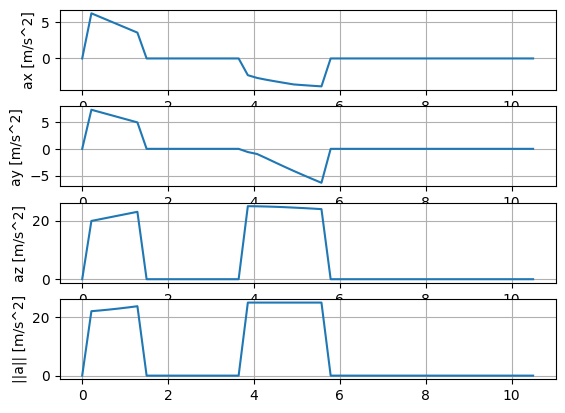

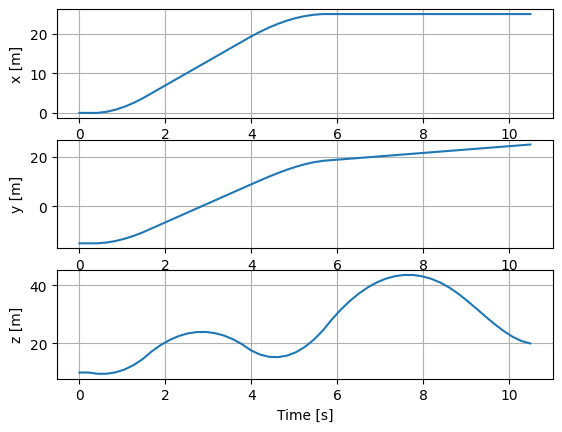

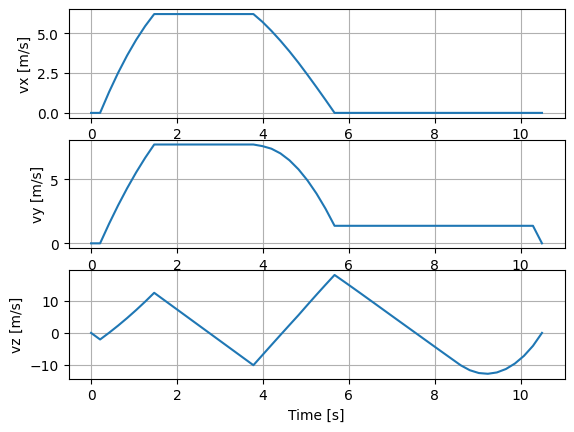

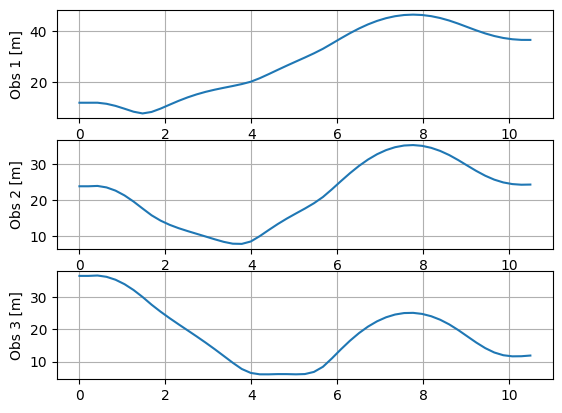

In [11]:
a_value=oa_cvxpy.value
nx_value=ox_cvxpy.value

plt.figure(5)
plt.subplot(411)
plt.plot(np.linspace(0, tf, T), a_value[0,:])
plt.ylabel('ax [m/s^2]')
plt.grid(True)
plt.subplot(412)
plt.plot(np.linspace(0, tf, T), a_value[1,:])
plt.ylabel('ay [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(413)
plt.plot(np.linspace(0, tf, T), a_value[2,:])
plt.ylabel('az [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(414)
plt.plot(np.linspace(0, tf, T), np.linalg.norm(a_value,axis=0))
plt.ylabel('||a|| [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(6)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[3,:])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[4,:])
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[5,:])
plt.xlabel('Time [s]')
plt.ylabel('z [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(7)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[0,:])
plt.xlabel('Time [s]')
plt.ylabel('vx [m/s]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[1,:])
plt.xlabel('Time [s]')
plt.ylabel('vy [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[2,:])
plt.xlabel('Time [s]')
plt.ylabel('vz [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(8)
plt.subplot(311)
pos_dron= nx_value[3:6,:]
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs1_double,axis=0))
plt.ylabel('Obs 1 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs2_double,axis=0))
plt.ylabel('Obs 2 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs3_double,axis=0))
plt.ylabel('Obs 3 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.show()

In [12]:
import numpy as np
import plotly.graph_objs as go

def plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres):

    # Extracting trajectory data
    x_traj = nx_value[3,:]
    y_traj = nx_value[4,:]
    z_traj = nx_value[5,:]

    # Plotting the trajectory
    trace_trajectory = go.Scatter3d(
        x=x_traj,
        y=y_traj,
        z=z_traj,
        mode='lines+markers',
        marker=dict(size=5, color='blue'),
        line=dict(color='blue', width=2)
    )
    data = [trace_trajectory]

    # Plotting the drone (initial position)
    trace_drone = go.Scatter3d(
        x=[x_traj[0]],
        y=[y_traj[0]],
        z=[z_traj[0]],
        mode='markers',
        marker=dict(size=10, color='green'),
        name='Drone'
    )
    data.append(trace_drone)

    # Loop to plot each sphere (obstacles)
    for sphere in spheres:
        h = sphere['h']
        rc = sphere['rc']

        # Generating sphere geometry
        u = np.linspace(0, 2 * np.pi, 32)
        v = np.linspace(0, np.pi, 16)
        x_sphere = rc * np.outer(np.cos(u), np.sin(v)) + h[0]
        y_sphere = rc * np.outer(np.sin(u), np.sin(v)) + h[1]
        z_sphere = rc * np.outer(np.ones(np.size(u)), np.cos(v)) + h[2]

        trace_sphere = go.Mesh3d(
            x=x_sphere.ravel(),
            y=y_sphere.ravel(),
            z=z_sphere.ravel(),
            color='red',
            opacity=0.3,
            alphahull=0,
            lighting=dict(ambient=0.5, specular=1.0)
        )

        data.append(trace_sphere)

    # Define the layout
    layout = go.Layout(
        title='Guidance via SCVx',
        scene=dict(
            xaxis_title='x [m]',
            yaxis_title='y [m]',
            zaxis_title='z [m]'
        ),
        updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                          method='animate', args=[None, dict(frame=dict(duration=25, redraw=True), fromcurrent=True, mode='immediate')])])]
    )

    fig = go.Figure(data=data, layout=layout)
    frames = [go.Frame(data=[go.Scatter3d(x=[x_traj[k]], y=[y_traj[k]], z=[z_traj[k]], mode='markers', marker=dict(size=10, color='green'))]) for k in range(len(x_traj))]
    fig.frames = frames
    fig.update_layout(scene=dict(aspectmode='data'))
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres)

In [ ]:
np.linalg.norm(vc.value)

5.2043089835548415e-08

# GuSTO (math)

Original non-convex optimization problem:

\begin{align*}
    \text{min} \quad &\Gamma=\int_{0}^{t_f}||\textbf{a}(t)||_2^2dt\\
    \text{s.t.}\quad
    &\ddot{\textbf{r}}(t)=\textbf{a}(t)-g\begin{bmatrix}
        0\\
        0\\
        1
    \end{bmatrix}\\
    &||\textbf{a}(t)||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}(0)=\textbf{r}_\text{init},\quad\dot{\textbf{r}}(0)=\textbf{v}_\text{init}\\
    &\textbf{r}(t_f)=\textbf{r}_\text{final},\quad\dot{\textbf{r}}(t_f)=\textbf{v}_\text{final}\\
    &-||\textbf{r}(t)-\textbf{c}_j||_2+d_{obs}\leq 0,\quad j=1,\dots,n_\text{obs}
\end{align*}

Non-convex mathematical model (in particular, it is convex):

\begin{equation}
    \textbf{x}_{k+1}=\textbf{f}(\textbf{x}_k,\textbf{a}_k)=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{a}_k+\tau\begin{bmatrix}
0&0&-g&0&0&0
\end{bmatrix}^T
\end{equation}

GuSTO costs:

\begin{equation}
L_{\lambda}^\Gamma(\textbf{x})=g_{tr}(\textbf{x},\textbf{a})+\sum_{n_w}h_\lambda(w_i(\textbf{x}))+||\textbf{a}||_2^2+\sum_{n_s}h_\lambda\bigg(-\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2+d_{j}-\frac{\left(\bar{\textbf{r}}-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2} \cdot\left(\textbf{r}-\bar{\textbf{r}}\right)\bigg)
\end{equation}

\begin{equation}
L_{\lambda,k}^{\Gamma,N}:=L_{\lambda}^\Gamma(\textbf{x}_k,\textbf{a}_k)
\end{equation}

\begin{equation}
\mathcal{L}_\lambda:=\text{trapz}(L_{\lambda}^{\Gamma,N})
\end{equation}

Where:

\begin{equation}
h_λ:=\lambda([z]^+)^2:=\begin{cases}
\lambda\cdot z^2,\quad z\geq0\\
0,\quad z<0
\end{cases}
\end{equation}

\begin{equation}
g_{tr}(\textbf{x})=h_\lambda(||\textbf{x}-\bar{\textbf{x}}||_\infty-η)
\end{equation}

\begin{equation}
w_i(\textbf{x})\leq 0\quad \forall i\in\{1,\dots,n_w\}\iff \textbf{x}\in\mathcal{X} \quad \text{(Convex inequalities constraints)}
\end{equation}

To update $\eta$ and $\lambda$:

\begin{equation}
\dot{\textbf{x}}_k^*:=\textbf{A}_d\textbf{x}_k^*+\textbf{B}_d\textbf{a}_k^*+\tau\begin{bmatrix}
0&0&-g&0&0&0
\end{bmatrix}^T
\end{equation}

\begin{equation}
\Delta f_k^*:=||\textbf{f}(\textbf{x}_k^*,\textbf{a}_k^*)-\dot{\textbf{x}}_k^*||_2=||\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{a}_k+τ\begin{bmatrix}
0&0&-g&0&0&0
\end{bmatrix}-\dot{\textbf{x}}_k^*||_2=0
\end{equation}

\begin{equation}
\Theta^*:=\text{trapz}(\Delta f^*)=0
\end{equation}

\begin{equation}
\times^*_k:=||\dot{\textbf{x}}_k^*||_2
\end{equation}

And:

\begin{equation}
J_\lambda^\Gamma(\textbf{x}_k,\textbf{a}_k):=\Gamma(\textbf{x}_k,\textbf{a}_k)+g_{tr}(\textbf{x}_k)+\sum_{n_w}h_\lambda(w_i(\textbf{x}_k))+\sum_{n_s}h_\lambda(s_i(\textbf{x}_k))
\end{equation}

\begin{equation}
J_\lambda^\Gamma(\textbf{x}_k,\textbf{a}_k)=||\textbf{a}_k||_2^2+h_\lambda(||\textbf{x}_k-\bar{\textbf{x}}||_\infty-η)+0+\sum_{n_s}h_\lambda(-||\textbf{r}_k-\textbf{c}_j||_2+d_{obs})
\end{equation}

\begin{equation}
J_{\lambda,k}^{\Gamma,N}:=J_\lambda^\Gamma(\textbf{x}_k,\textbf{a}_k)
\end{equation}

\begin{equation}
\mathcal{J}_{\lambda}(\textbf{x},\textbf{u}):=\text{trapz}(J_{\lambda}^{\Gamma,N})
\end{equation}

\begin{equation}
\rho:=\frac{|\mathcal{J}_\lambda(\textbf{x}^*,\textbf{u}^*)-\mathcal{L}_\lambda(\textbf{x}^*,\textbf{u}^*)|+\Theta^*}{|\mathcal{L}_\lambda(\textbf{x}^*,\textbf{u}^*)|+\text{trapz}(\times^*)}
\end{equation}

Additional hint:

\begin{equation}
\text{update}(\lambda)=\begin{cases}
\lambda_0,\quad -\lVert \textbf{r}_k^*-\textbf{c}_j \rVert+d_{j}\leq 0\quad\text{and}\quad\textbf{x}_k^*\in\mathcal{X}\quad\forall k,j\\
\gamma_\text{fail}\lambda,\quad\text{else}
\end{cases}
\end{equation}

In each iteration the following optimization problem is solved:

\begin{align*}
    \text{min} \quad &\mathcal{L}_{\lambda}\\
    \text{s.t.}\quad
    &\textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{a}_k\\
    &||\textbf{a}_k||_2\leq\textbf{a}_\text{max}\\
    &\textbf{r}_0=\textbf{r}_\text{init},\quad\textbf{v}_0=\textbf{v}_\text{init}\\
    &\textbf{r}_{T+1}=\textbf{r}_\text{final},\quad\textbf{v}_{T+1}=\textbf{v}_\text{final}
\end{align*}

In order to follow both Disciplined Convex Programming (DCP) and Disciplined Parametrized Programming (DPP) rules:

\begin{equation}
\lambda\cdot\bigg(-\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2+d_{j}-\frac{\left(\bar{\textbf{r}}-\textbf{c}_j\right)^T }{\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2} \cdot\left(\textbf{r}-\bar{\textbf{r}}\right)\bigg)^2
\end{equation}

\begin{equation}
=(\textbf{a_aux}^T\textbf{r})^2-2\textbf{b_aux}\cdot\textbf{r}+\text{c_aux}
\end{equation}

Where:

\begin{equation}
\textbf{a_aux}=\sqrt{\lambda}\frac{(\bar{\textbf{r}}-c_j)}{||\bar{\textbf{r}}-c_j||_2}
\end{equation}

\begin{equation}
\textbf{b_aux}=2\lambda\frac{(\bar{\textbf{r}}-c_j)^T}{||\bar{\textbf{r}}-c_j||_2}\bar{\textbf{r}}\frac{(\bar{\textbf{r}}-c_j)^T}{||\bar{\textbf{r}}-c_j||_2}-2\lambda\bigg(\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2+d_{j}\bigg)
\end{equation}

\begin{equation}
\text{c_aux}=\lambda\bigg(\frac{(\bar{\textbf{r}}-c_j)^T}{||\bar{\textbf{r}}-c_j||_2}\bar{\textbf{r}}\bigg)^2+\lambda\bigg(-\lVert\bar{\textbf{r}}-\textbf{c}_j\rVert_2+d_{j}\bigg)^2
\end{equation}

# GuSTO example

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

print("numpy version",np.__version__)
print("cvxpy version",cp.__version__)

T = 31-1 # 101-1 representa 101 puntos de discretización
tf = 5.0
tau = tf/(T)

numpy version 2.0.2
cvxpy version 1.6.4


In [ ]:
nx = cp.Variable((6, T + 1), name='new_x')
a = cp.Variable((3, T), name='a')
etta = cp.Parameter(name='etta')

startpos_cvxpy = cp.Parameter((6,1), name='start_pos')
endpos_cvxpy = cp.Parameter((6,1), name='end_pos')

ox_aux = cp.Parameter((6,T + 1), name='ox_aux')
etta_ox_aux = cp.Parameter((6,T + 1), name='etta_ox_aux')
ox_cvxpy = cp.Parameter((6,T + 1), name='ox_cvxpy')
oa_cvxpy = cp.Parameter((3,T), name='oa_cvxpy')

c_obs1 = cp.Parameter((3,1), name='c_obs1')
c_obs2 = cp.Parameter((3,1), name='c_obs2')
c_obs3 = cp.Parameter((3,1), name='c_obs3')

aux_a_obs1 = cp.Parameter((T+1,1), name='aux_a_obs1')
aux_b_obs1 = cp.Parameter((T+1,3), name='aux_b_obs2')

aux_a_obs2 = cp.Parameter((T+1,1), name='aux_a_obs2')
aux_b_obs2 = cp.Parameter((T+1,3), name='aux_b_obs2')

aux_a_obs3 = cp.Parameter((T+1,1), name='aux_a_obs3')
aux_b_obs3 = cp.Parameter((T+1,3), name='aux_b_obs3')

aux_aux_a_obs1 = np.zeros((T+1,1))
aux_aux_b_obs1 = np.zeros((T+1,3))

aux_aux_a_obs2 = np.zeros((T+1,1))
aux_aux_b_obs2 = np.zeros((T+1,3))

aux_aux_a_obs3 = np.zeros((T+1,1))
aux_aux_b_obs3 = np.zeros((T+1,3))

A_discrete = cp.Parameter((6,6), name='A_discrete')
B_discrete = cp.Parameter((6,3), name='B_discrete')

lamb = cp.Parameter(name='lamb')
sqrt_lamb = cp.Parameter(name='sqrt_lamb')
sqrtlamb_etta = cp.Parameter(name='sqrtlamb_etta')

d_obs1 = cp.Parameter(name='d_obs1')
d_obs2 = cp.Parameter(name='d_obs2')
d_obs3 = cp.Parameter(name='d_obs3')

a_max = cp.Parameter(name='a_max')
aux_g = cp.Parameter((6,1), name='aux_g')

constraints = [
    nx[:, 0] == startpos_cvxpy[:,0],
    nx[:, T] == endpos_cvxpy[:,0],
    a[:, 0] == 0, a[:, T-1] == 0
]
cost = 0

for k in range(0, T): # from 0 to T-1
    constraints  += [nx[:, k+1] == A_discrete @ nx[:, k] + B_discrete @ (a[:, k])-tau*aux_g[:,0]]
    constraints  += [cp.norm(a[:, k], 2)<=a_max]
    cost += tau*cp.sum_squares(a[:,k]) #sum(a**2)
    #sum_nw_hlambda(w(x)) = 0

for k in range(0, T+1):
    cost += tau*cp.power(cp.pos(cp.sum([cp.norm(sqrt_lamb*nx[:, k]-ox_aux[:,k],'inf'),-sqrtlamb_etta])),2) #g_tr

    cost += tau*cp.power(cp.pos(cp.sum([aux_a_obs1[k,0],aux_b_obs1[k,:]@nx[3:6, k]])),2) #sum_n_s
    cost += tau*cp.power(cp.pos(cp.sum([aux_a_obs2[k,0],aux_b_obs2[k,:]@nx[3:6, k]])),2) #sum_n_s
    cost += tau*cp.power(cp.pos(cp.sum([aux_a_obs3[k,0],aux_b_obs3[k,:]@nx[3:6, k]])),2) #sum_n_s

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

Let's check if our modeled optimization problems follows Disciplined Parametrized Programming rules.

In [ ]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [ ]:
startpos=np.array([[0.0],[0.0],[0.0],[0],[-15],[10.0]])
endpos=np.array([[0.0],[0.0],[0.0],[25],[25],[20.0]]) #descoméntame 1

alpha1=1/4
alpha2=2/4
alpha3=3/4
c_obs1_double = np.array([[alpha1*25+(1-alpha1)*0+0.3],[alpha1*25+(1-alpha1)*(-15)+0.1],[10]])
c_obs2_double = np.array([[alpha2*25+(1-alpha2)*0-0.3],[alpha2*25+(1-alpha2)*(-15)-0.1],[15]]) #descoméntame 1
c_obs3_double = np.array([[alpha3*25+(1-alpha3)*0+0.2],[alpha3*25+(1-alpha3)*(-15)-0.2],[20]]) #descoméntame 1

print("c1:", c_obs1_double)
print("c2:", c_obs2_double)
print("c3:", c_obs3_double)

d_obs1_double = 6
d_obs2_double = 3
d_obs3_double = 6

a_max_double = 25*2
g_double=9.81

obs_tol_double=0.005 #5mm (useful for lambda_update)

ox_pos = np.column_stack((np.array([np.linspace(startpos[3,0], endpos[3,0], T+1), np.linspace(startpos[4,0], endpos[4,0], T+1),np.linspace(startpos[5,0], endpos[5,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T + 1):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau
ox=np.block([[ox_vel],[ox_pos]])
oa=np.zeros((3,T))
A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]])
B = np.vstack((np.eye(3), np.zeros((3, 3))))

A_discrete.value = np.eye(6)+tau*A
B_discrete.value = tau*B
aux_g.value = np.array([[0],[0],[9.81],[0],[0],[0]])
a_max.value = a_max_double

c1: [[ 6.55]
 [-4.9 ]
 [10.  ]]
c2: [[12.2]
 [ 4.9]
 [15. ]]
c3: [[18.95]
 [14.8 ]
 [20.  ]]


In [ ]:
def h_lambda(z):
  if z>=0:
    return lamb.value*z**2
  if z<0:
    return 0
def lamb_update(lamb,x_opt,T):
    obs1_bool=True
    obs2_bool=True
    obs3_bool=True
    for k in range(0,T+1,1):
        obs1_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs1_double,ord=2)>=d_obs1_double-obs_tol_double) and obs1_bool
        obs2_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs2_double,ord=2)>=d_obs2_double-obs_tol_double) and obs2_bool
        obs3_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs3_double,ord=2)>=d_obs3_double-obs_tol_double) and obs3_bool
        if not(obs1_bool) or not(obs2_bool) or not(obs3_bool):
            print("obs 1",np.linalg.norm(x_opt[3:6,k:k+1]-c_obs1_double,ord=2)-d_obs1_double)
            print("obs 2",np.linalg.norm(x_opt[3:6,k:k+1]-c_obs2_double,ord=2)-d_obs2_double)
            print("obs 3",np.linalg.norm(x_opt[3:6,k:k+1]-c_obs3_double,ord=2)-d_obs3_double)
            break;
    print("obs 1 bool: ",obs1_bool)
    print("obs 2 bool: ",obs2_bool)
    print("obs 3 bool: ",obs3_bool)
    if obs1_bool and obs2_bool and obs3_bool:
        return lambda_0
    else:
        return gamma_fail*lamb
def sum_x_star(x_opt,a_opt,T):
    A_discrete_GuSTO=np.eye(6)+tau*A
    B_discrete_GuSTO=tau*B
    sum_x=0
    #print("dx_k_star")
    for k in range(0,T,1):
        dx_k_star=A_discrete_GuSTO@x_opt[:, k:k+1]+B_discrete_GuSTO@a_opt[:, k:k+1]-tau*np.array([[0],[0],[9.81],[0],[0],[0]])
        #print(dx_k_star)
        sum_x+=tau*np.linalg.norm(dx_k_star,ord=2)
    return sum_x
def J_lamb_GuSTO(x,a,etta,T):
    cost1 = 0
    cost2 = 0
    cost3 = 0
    for k in range(0, T): # from 0 to T-1
        cost1+=tau*np.linalg.norm(a[:,k:k+1], ord=2)**2
    for k in range(0, T+1):
        cost2 += tau*h_lambda(np.linalg.norm(x[:,k:k+1]-ox[:,k:k+1], ord=np.inf)-etta)
    for k in range(0, T+1):
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs1_double, ord=2)+d_obs1_double)
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs2_double, ord=2)+d_obs2_double)
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs3_double, ord=2)+d_obs3_double)
    return cost1+cost2+cost3

startpos_cvxpy.value=startpos
endpos_cvxpy.value=endpos

t0 = time.time()

lambda_0=10**4
lambda_max=10**9
etta_double=10

rho0=0.1
rho1=0.9

etta0=0.001
etta1=10

lamb_double=lambda_0
sqrt_lamb_double=np.sqrt(lambda_0)
etta_double=10

beta_sh=2
beta_gr=2

gamma_fail=5
mu=0.8
k_star=6

d_obs1.value = d_obs1_double
d_obs2.value = d_obs2_double
d_obs3.value = d_obs3_double

c_obs1.value = c_obs1_double
c_obs2.value = c_obs2_double
c_obs3.value = c_obs3_double

lamb.value = lamb_double
sqrt_lamb.value = sqrt_lamb_double
etta.value = etta_double
sqrtlamb_etta.value = sqrt_lamb_double*etta_double

ox_cvxpy.value = ox #trajectory initialization (control)
ox_aux.value = sqrt_lamb_double*ox

oa = np.zeros((3,T)) #trajectory initialization (input)
oa_cvxpy.value = oa #trajectory initialization (input)

e_tol=0.024 #stopping threshold related to Delta_u

i=1
trapz_Deltau=100

J_GuSTO_stop=100
epsilon_r=0.001

while lamb.value<lambda_max and (trapz_Deltau>e_tol) and J_GuSTO_stop>epsilon_r:
    for k in range(0,T+1,1):
        aux_aux_a_obs1[k,0] = -np.sqrt(lamb.value)*np.linalg.norm(ox[3:6,k]-c_obs1.value[:,0],2)+np.sqrt(lamb.value)*d_obs1.value+np.sqrt(lamb.value)*(ox[3:6,k]-c_obs1.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs1.value[:,0],2))@ox[3:6,k]
        aux_aux_b_obs1[k:k+1,:] = -np.sqrt(lamb.value)*(ox[3:6,k]-c_obs1.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs1.value[:,0],2))

        aux_aux_a_obs2[k,0] = -np.sqrt(lamb.value)*np.linalg.norm(ox[3:6,k]-c_obs2.value[:,0],2)+np.sqrt(lamb.value)*d_obs2.value+np.sqrt(lamb.value)*(ox[3:6,k]-c_obs2.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs2.value[:,0],2))@ox[3:6,k]
        aux_aux_b_obs2[k:k+1,:] = -np.sqrt(lamb.value)*(ox[3:6,k]-c_obs2.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs2.value[:,0],2))

        aux_aux_a_obs3[k,0] = -np.sqrt(lamb.value)*np.linalg.norm(ox[3:6,k]-c_obs3.value[:,0],2)+np.sqrt(lamb.value)*d_obs3.value+np.sqrt(lamb.value)*(ox[3:6,k]-c_obs3.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs3.value[:,0],2))@ox[3:6,k]
        aux_aux_b_obs3[k:k+1,:] = -np.sqrt(lamb.value)*(ox[3:6,k]-c_obs3.value[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs3.value[:,0],2))

    aux_a_obs1.value=aux_aux_a_obs1
    aux_b_obs1.value=aux_aux_b_obs1

    aux_a_obs2.value=aux_aux_a_obs2
    aux_b_obs2.value=aux_aux_b_obs2

    aux_a_obs3.value=aux_aux_a_obs3
    aux_b_obs3.value=aux_aux_b_obs3

    val = problem.solve()

    L_lambda=val
    x_opt = nx.value
    a_opt = a.value

    trapz_Deltau=0
    for k in range(0,T,1):
        trapz_Deltau+=tau*np.linalg.norm(a_opt[:, k:k+1]-oa[:, k:k+1], ord=np.inf)

    J_lamb_opt=J_lamb_GuSTO(x_opt,a_opt,etta.value,T)
    J_lamb_old=J_lamb_GuSTO(ox,oa,etta.value,T)
    J_GuSTO_stop=np.abs(J_lamb_old-J_lamb_opt)/np.abs(J_lamb_old)

    flag_case4=True
    for k in range(0,T+1,1):
        if np.linalg.norm(x_opt[:, k:k+1]-ox[:, k:k+1], ord=np.inf)>etta.value:
            print("Case 4")
            etta.value=etta.value
            ox=ox
            oa=oa
            lamb.value=gamma_fail*lamb.value
            flag_case4=False
            break;
    if flag_case4:
      rho_i=(abs(J_lamb_opt-L_lambda))/(abs(L_lambda)+sum_x_star(x_opt,a_opt,T))
      print("J_lamb_GuSTO: ",J_lamb_GuSTO(x_opt,a_opt,etta.value,T)," L_lambda: ",L_lambda," rho:",rho_i)
      if rho_i<rho0:
          etta.value=min([etta1,beta_gr*etta.value])
          ox = x_opt
          oa = a_opt
          lamb.value=lamb_update(lamb.value,x_opt,T)
          print("Case 1")
      if rho_i>=rho0 and rho_i<rho1:
          etta.value=etta.value
          ox = x_opt
          oa = a_opt
          lamb.value=lamb_update(lamb.value,x_opt,T)
          print("Case 2")
      if rho_i>=rho1:
          etta.value=max([etta0,etta.value/beta_sh])
          ox=ox
          oa=oa
          lamb.value=lamb.value
          print("Case 3")

    sqrtlamb_etta.value = (lamb.value)**0.5*etta.value
    ox_cvxpy.value=ox
    oa_cvxpy.value=oa
    ox_aux.value = (lamb.value)**0.5*ox
    sqrt_lamb.value=(lamb.value)**0.5

    print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta.value,"Lambda: ",lamb.value,"Trap_Du: ",trapz_Deltau, "J_stop: ",J_GuSTO_stop)
    i=i+1

t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

J_lamb_GuSTO:  1632.0186564287148  L_lambda:  1643.2702623927573  rho: 0.006289521853529511
obs 1 bool:  True
obs 2 bool:  True
obs 3 bool:  True
Case 1
 Iteration number:  1  Cost function:  1643.2702623927573  Etta:  10 Lambda:  10000 Trap_Du:  67.81328393371308 J_stop:  0.9889986813824553
J_lamb_GuSTO:  1005.4028222288655  L_lambda:  1006.0468915430238  rho: 0.0005592667598730614
obs 1 bool:  True
obs 2 bool:  True
obs 3 bool:  True
Case 1
 Iteration number:  2  Cost function:  1006.0468915430238  Etta:  10 Lambda:  10000 Trap_Du:  28.3867289290014 J_stop:  0.38395139156745256
J_lamb_GuSTO:  916.9584664195779  L_lambda:  917.2151965046929  rho: 0.00024191716931063064
obs 1 bool:  True
obs 2 bool:  True
obs 3 bool:  True
Case 1
 Iteration number:  3  Cost function:  917.2151965046929  Etta:  10 Lambda:  10000 Trap_Du:  10.53199070435884 J_stop:  0.08796907453792137
J_lamb_GuSTO:  900.954313436908  L_lambda:  901.0734249682174  rho: 0.00011410516250236013
obs 1 bool:  True
obs 2 bool:

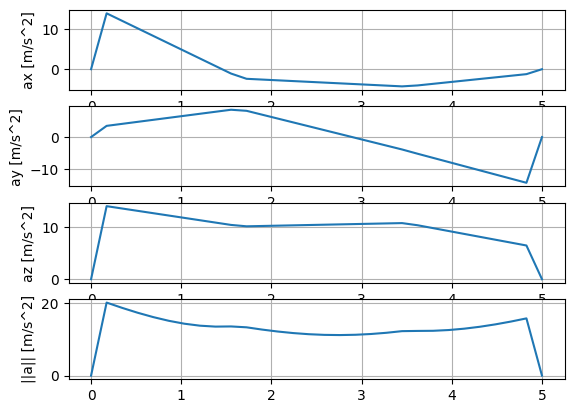

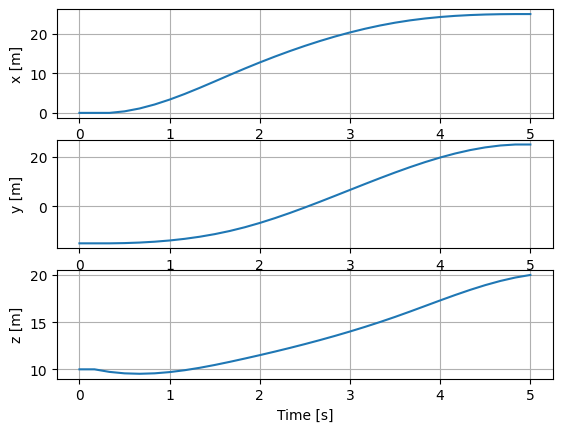

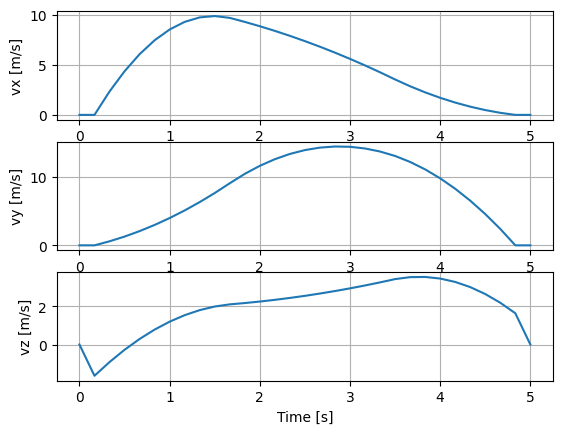

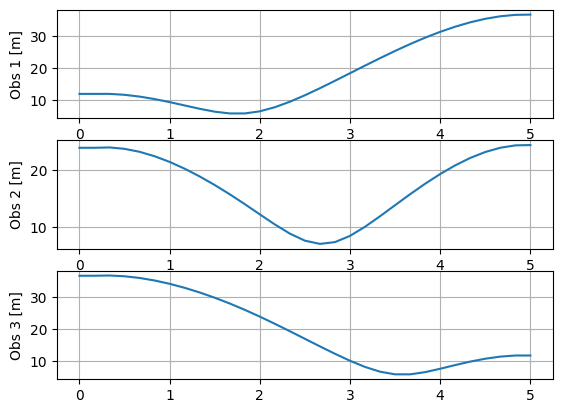

In [ ]:
a_value=a.value
nx_value=nx.value

plt.figure(5)
plt.subplot(411)
plt.plot(np.linspace(0, tf, T), a_value[0,:])
plt.ylabel('ax [m/s^2]')
plt.grid(True)
plt.subplot(412)
plt.plot(np.linspace(0, tf, T), a_value[1,:])
plt.ylabel('ay [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(413)
plt.plot(np.linspace(0, tf, T), a_value[2,:])
plt.ylabel('az [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(414)
plt.plot(np.linspace(0, tf, T), np.linalg.norm(a_value,axis=0))
plt.ylabel('||a|| [m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(6)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[3,:])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[4,:])
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[5,:])
plt.xlabel('Time [s]')
plt.ylabel('z [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(7)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[0,:])
plt.xlabel('Time [s]')
plt.ylabel('vx [m/s]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[1,:])
plt.xlabel('Time [s]')
plt.ylabel('vy [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[2,:])
plt.xlabel('Time [s]')
plt.ylabel('vz [m/s]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(8)
plt.subplot(311)
pos_dron= nx_value[3:6,:]
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs1_double,axis=0))
plt.ylabel('Obs 1 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs2_double,axis=0))
plt.ylabel('Obs 2 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs3_double,axis=0))
plt.ylabel('Obs 3 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objs as go

def plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres):

    # Extracting trajectory data
    x_traj = nx_value[3,:]
    y_traj = nx_value[4,:]
    z_traj = nx_value[5,:]

    # Plotting the trajectory
    trace_trajectory = go.Scatter3d(
        x=x_traj,
        y=y_traj,
        z=z_traj,
        mode='lines+markers',
        marker=dict(size=5, color='blue'),
        line=dict(color='blue', width=2)
    )
    data = [trace_trajectory]

    # Plotting the drone (initial position)
    trace_drone = go.Scatter3d(
        x=[x_traj[0]],
        y=[y_traj[0]],
        z=[z_traj[0]],
        mode='markers',
        marker=dict(size=10, color='green'),
        name='Drone'
    )
    data.append(trace_drone)

    # Loop to plot each sphere (obstacles)
    for sphere in spheres:
        h = sphere['h']
        rc = sphere['rc']

        # Generating sphere geometry
        u = np.linspace(0, 2 * np.pi, 32)
        v = np.linspace(0, np.pi, 16)
        x_sphere = rc * np.outer(np.cos(u), np.sin(v)) + h[0]
        y_sphere = rc * np.outer(np.sin(u), np.sin(v)) + h[1]
        z_sphere = rc * np.outer(np.ones(np.size(u)), np.cos(v)) + h[2]

        trace_sphere = go.Mesh3d(
            x=x_sphere.ravel(),
            y=y_sphere.ravel(),
            z=z_sphere.ravel(),
            color='red',
            opacity=0.3,
            alphahull=0,
            lighting=dict(ambient=0.5, specular=1.0)
        )

        data.append(trace_sphere)

    # Define the layout
    layout = go.Layout(
        title='Guidance via GuSTO',
        scene=dict(
            xaxis_title='x [m]',
            yaxis_title='y [m]',
            zaxis_title='z [m]'
        ),
        updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                          method='animate', args=[None, dict(frame=dict(duration=25, redraw=True), fromcurrent=True, mode='immediate')])])]
    )

    fig = go.Figure(data=data, layout=layout)
    frames = [go.Frame(data=[go.Scatter3d(x=[x_traj[k]], y=[y_traj[k]], z=[z_traj[k]], mode='markers', marker=dict(size=10, color='green'))]) for k in range(len(x_traj))]
    fig.frames = frames
    fig.update_layout(scene=dict(aspectmode='data'))
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_spheres_and_drone(nx_value, spheres)

# SCVx astrobee

Sea el sistema general Lineal de Tiempo Variable:

\begin{equation}
    \dot{\textbf{x}}(t)=\textbf{A}(t)\textbf{x}(t)+\textbf{B}(t)\textbf{u}(t)+\textbf{w}(t)
\end{equation}

Para un intervalo de tiempo $t \in [t_k,t_{k+1}]$, la solución exacta para $\textbf{x}$ está dada por:

\begin{equation}
    \textbf{x}(t)=\Phi(t,t_k)\textbf{x}(t_k)+\int_{t_k}^{t}\Phi(t,\xi)\textbf{B}(\xi)\textbf{u}(\xi)d\xi+\int_{t_k}^{t}\Phi(t,\xi)\textbf{w}(\xi)d\xi+
\end{equation}

Suponiendo que $\textbf{A}(t)$, $\textbf{B}(t)$, son constantes y una condición de sujeción de orden cero para $\textbf{u}(t)$ y $\textbf{w}(t)$, lo cual implica que $\textbf{u}(t_k)$ y $\textbf{w}(t_k)$ son constantes en el intervalo $[t_k,t_{k+1}]$. Por lo tanto, la solución evaluada en $t_{k+1}$ se convierte en:

\begin{equation}
    \textbf{x}(t_{k+1})=e^{\textbf{A}(t_{k+1}-t_k)}\textbf{x}(t_k)+\Bigg( \int_{0}^{t_{k+1}-t_k}e^{\textbf{A}(t_{k+1}-t_k-\xi)}d\xi\Bigg) \textbf{B}\textbf{u}(t_k)+\Bigg( \int_{0}^{t_{k+1}-t_k}e^{\textbf{A}(t_{k+1}-t_k-\xi)}d\xi\Bigg)\textbf{w}
\end{equation}

Denotando $\tau\triangleq t_{k+1}-t_k$ y resolviendo la integral:

\begin{equation}
    \textbf{x}(t_{k+1})=\sum_{k=0}^{\infty}\frac{1}{k!}(\textbf{A}\tau)^k\textbf{x}(t_k)+\left(\sum_{k=1}^{\infty}\frac{1}{k!}\textbf{A}^{k-1}\tau^k\right) \textbf{B}\textbf{u}(t_k)+\left(\sum_{k=1}^{\infty}\frac{1}{k!}\textbf{A}^{k-1}\tau^k\right) \textbf{w}
\end{equation}

Para simplificar la notación, se define:

\begin{equation*}
\textbf{x}_{j}\triangleq\textbf{x}(t_{j}),\quad\textbf{A}_d\triangleq\sum_{k=0}^{\infty}\frac{1}{k!}(\textbf{A}\tau)^k,\quad\textbf{B}_d\triangleq\sum_{k=1}^{\infty}\frac{1}{k!}\textbf{A}^{k-1}\tau^k\textbf{B},\quad\textbf{w}_d\triangleq\sum_{k=1}^{\infty}\frac{1}{k!}\textbf{A}^{k-1}\tau^k\textbf{w}
\end{equation*}

Por lo tanto, el modelo discretizado (exacto) se expresa de la siguiente manera:

\begin{equation}
    \textbf{x}_{k+1}=\textbf{A}_d\textbf{x}_k+\textbf{B}_d\textbf{u}_k+\textbf{w}_d
\end{equation}
$\textbf{Nota:}$ Muchos ingenieros, suelen considerar numéricalmente los dos primeros términos de la sumatoria para $\textbf{A}_d$, y el primer término tanto para $\textbf{B}_d$ como $\textbf{w}_d$. De esta manera:

\begin{equation}
\textbf{A}_d\approx([I]+\tau\textbf{A}),\quad\textbf{B}_d\approx\tau\textbf{B},\quad\textbf{w}_d\approx\tau\textbf{w}
\end{equation}

In [ ]:
!pip install ecos
!pip install qoco

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time
import ecos
import math
print("numpy version",np.__version__)
print("cvxpy version",cp.__version__)

T = 31-1 # 101-1 means 101 discretization points
tf = 200.0
tau = tf/(T)
size_N=20
print("Step: ",tau," [s]")

start_xyz=np.array([[0.0],[-1.0],[1.2]])
end_xyz=np.array([[5.0],[2.0],[1.2]])

start_quat=np.array([[0],[1],[0],[0]])
#end_quat=np.array([[0.3**0.5],[0.4**0.5],[0.1**0.5],[0.2**0.5]])
#end_quat=np.array([[0],[0],[0],[1]])
end_quat=np.array([[0],[0],[1],[0]])
#end_quat=np.array([[1],[0],[0],[0]])

startpos=np.block([[0.0],[0.0],[0.0],[start_xyz],[start_quat],[0],[0],[0]])
endpos=np.block([[0.0],[0.0],[0.0],[end_xyz],[end_quat],[0],[0],[0]])

c_obs1_double = np.array([[1.1],[-0.5],[1]])
c_obs2_double = np.array([[2.6],[0.5],[1.1]])
c_obs3_double = np.array([[4],[1.6],[1.2]])

d_obs1_double = 0.8
d_obs2_double = 0.8
d_obs3_double = 0.8

J1_double=0.1083
J2_double=0.1083
J3_double=0.1083

u_max_acc_double = 20/7.2*0.001
#u_max_torq_double = 100*0.0000002
u_max_torq_double = 100*0.000001

vel_max_double = 0.4
omega_max_double = 5.0*np.pi/180


#Guidance parameters
rho0=0.0
rho1=0.1
rho2=0.7
etta0=0.001
etta1=10
beta_sh=2
beta_gr=2

lamb_double=1000
etta_double=5

e_tol=0.05
epsilon_stop_norm=0.04

u_CW_scaling=np.array([[1/u_max_acc_double,0,0],[0,1/u_max_acc_double,0],[0,0,1/u_max_acc_double]])
u_qw_scaling=np.array([[1/u_max_torq_double,0,0],[0,1/u_max_torq_double,0],[0,0,1/u_max_torq_double]])

numpy version 2.0.2
cvxpy version 1.6.4
Step:  6.666666666666667  [s]


In [ ]:
nx = cp.Variable((13, T + 1), name='nx')
u = cp.Variable((6, T), name='u')
vc = cp.Variable((13, T), name='vc')
vb1 = cp.Variable((T + 1, 1), name='vb1')
vb2 = cp.Variable((T + 1, 1), name='vb2')
vb3 = cp.Variable((T + 1, 1), name='vb3')

startpos_cvxpy = cp.Parameter((13,1), name='start_pos')
endpos_cvxpy = cp.Parameter((13,1), name='end_pos')

ox_cvxpy = cp.Parameter((13,T + 1), name='ox_cvxpy')
ou_cvxpy = cp.Parameter((6,T), name='ou_cvxpy')

A_discrete_CW = cp.Parameter((6,6), name='A_discrete_CW')
B_discrete_CW_scaled = cp.Parameter((6,3), name='B_discrete_CW_scaled')

A_discrete_qw = cp.Parameter((7,7*T), name='A_discrete_qw')
B_discrete_qw_scaled = cp.Parameter((7,3*T), name='B_discrete_qw_scaled')
w_discrete_qw = cp.Parameter((7,T), name='w_discrete_qw')

a_linear_obs1 = cp.Parameter((3,T+1), name='a_linear_obs1')
b_linear_obs1 = cp.Parameter((1,T+1), name='b_linear_obs1')
a_linear_obs2 = cp.Parameter((3,T+1), name='a_linear_obs2')
b_linear_obs2 = cp.Parameter((1,T+1), name='b_linear_obs2')
a_linear_obs3 = cp.Parameter((3,T+1), name='a_linear_obs3')
b_linear_obs3 = cp.Parameter((1,T+1), name='b_linear_obs3')

lamb = cp.Parameter(name='lamb')
etta = cp.Parameter(name='etta')

vel_max = cp.Parameter(name='vel_max')
omega_max = cp.Parameter(name='omega_max')

constraints = [
    nx[:, 0] == startpos_cvxpy[:,0],
    nx[:, T] == endpos_cvxpy[:,0],
    #u[:,0]==0,u[:,-1]==0
]
cost = 0

for k in range(0, T): # from 0 to T-1
    constraints += [nx[0:6, k+1] == A_discrete_CW @ nx[0:6, k] + B_discrete_CW_scaled @ (u[0:3, k])+vc[0:6, k]]

    constraints += [nx[6:13, k+1] == A_discrete_qw[:,7*k:7*k+7] @ nx[6:13, k] + B_discrete_qw_scaled[:,3*k:3*k+3] @ (u[3:6, k]) + w_discrete_qw[:,k] + vc[6:13, k]] #q1_k+1

    constraints += [cp.norm(u[0:3, k], 2) <= 1]
    constraints += [cp.norm(u[3:6, k], 2) <= 1]
    cost += tau*cp.sum_squares(u[0:3,k])
    cost += tau*cp.sum_squares(u[3:6,k])
    cost += tau*cp.norm(lamb*vc[:, k], 1)
    constraints  += [cp.norm(nx[:, k]-ox_cvxpy[:,k],'inf')+cp.norm(u[:, k]-ou_cvxpy[:,k],'inf')<=etta]

for k in range(0, T+1):
    cost += tau*cp.norm(lamb*vb1[k,0], 1)
    cost += tau*cp.norm(lamb*vb2[k,0], 1)
    cost += tau*cp.norm(lamb*vb3[k,0], 1)

    constraints  += [a_linear_obs1[0:3,k:k+1].T@nx[3:6, k:k+1]+b_linear_obs1[0,k]<=vb1[k,0]]
    constraints  += [a_linear_obs2[0:3,k:k+1].T@nx[3:6, k:k+1]+b_linear_obs2[0,k]<=vb2[k,0]]
    constraints  += [a_linear_obs3[0:3,k:k+1].T@nx[3:6, k:k+1]+b_linear_obs3[0,k]<=vb3[k,0]]

    constraints += [cp.norm(nx[0:3,k], 2)<=vel_max]
    constraints += [cp.norm(nx[10:13,k], 2)<=omega_max]

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [ ]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [ ]:
aux_A_discrete_qw = np.zeros((7,7*T))
aux_B_discrete_qw_scaled = np.zeros((7,3*T))
aux_w_discrete_qw = np.zeros((7,T))

aux_a_linear_obs1 = np.zeros((3,T+1))
aux_b_linear_obs1 = np.zeros((1,T+1))
aux_a_linear_obs2 = np.zeros((3,T+1))
aux_b_linear_obs2 = np.zeros((1,T+1))
aux_a_linear_obs3 = np.zeros((3,T+1))
aux_b_linear_obs3 = np.zeros((1,T+1))

In [ ]:
from scipy.spatial.transform import Rotation as R, Slerp

def scaling_begin(u,u_scaling,T):
    for k in range(0, T):
        u[:,k:k+1]=u_scaling@u[:,k:k+1]
    return u
def scaling_end(u,u_scaling,T):
    for k in range(0, T):
        u[:,k:k+1]=np.linalg.inv(u_scaling)@u[:,k:k+1]
    return u

def slerp(q1, q2, num_samples):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)

    if np.abs(theta_0) < 1e-6:
        return np.linspace(q1, q2, num_samples)

    sin_theta_0 = np.sin(theta_0)

    quaternions = []
    for i in range(num_samples):
        t = i / (num_samples - 1)
        theta = theta_0 * t
        sin_theta = np.sin(theta)
        s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
        s1 = sin_theta / sin_theta_0
        quaternions.append(s0 * q1 + s1 * q2)

    return np.array(quaternions)

def compute_angular_velocity(quaternions, dt):

    rotations = R.from_quat(quaternions)
    angular_velocities = [[0,0,0]]

    for i in range(len(rotations) - 1):
        delta_rot = rotations[i + 1] * rotations[i].inv()
        log_rot = delta_rot.as_rotvec() / dt
        angular_velocities.append(log_rot)

    return np.array(angular_velocities)

def exp_matrix_taylor_A(A,h,n):
    size_n,size_aux=np.shape(A)
    sum=np.eye(size_n)+A*h
    for i in range(2,n+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(h*A,i)
    return sum

def exp_matrix_taylor_B(A,B,h,n):
    size_n,size_aux=np.shape(A)
    sum=h*np.eye(size_n)
    for i in range(2,n+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(A,i-1)*h**i
    return sum@B

def f_qw(x,u):
    aux_f=np.zeros((7,1))

    oq1=x[0,0]
    oq2=x[1,0]
    oq3=x[2,0]
    oq4=x[3,0]
    ow1=x[4,0]
    ow2=x[5,0]
    ow3=x[6,0]

    ou1=u[0,0]
    ou2=u[1,0]
    ou3=u[2,0]

    aux_f[0,0]=0.5*(oq4*ow1-oq3*ow2+oq2*ow3)
    aux_f[1,0]=0.5*(oq3*ow1+oq4*ow2-oq1*ow3)
    aux_f[2,0]=0.5*(-oq2*ow1+oq1*ow2+oq4*ow3)
    aux_f[3,0]=0.5*(-oq1*ow1-oq2*ow2-oq3*ow3)

    aux_f[4,0]=(1/J1_double)*(-(J3_double-J2_double)*ow2*ow3+ou1)
    aux_f[5,0]=(1/J2_double)*(-(J1_double-J3_double)*ow3*ow1+ou2)
    aux_f[6,0]=(1/J3_double)*(-(J2_double-J1_double)*ow1*ow2+ou3)
    return aux_f

def A_qw(oxqw):
  oq1=oxqw[0,0]
  oq2=oxqw[1,0]
  oq3=oxqw[2,0]
  oq4=oxqw[3,0]
  ow1=oxqw[4,0]
  ow2=oxqw[5,0]
  ow3=oxqw[6,0]
  aux_A_qw=np.zeros((7,7))
  aux_A_qw[0:4,:]=0.5*np.array([[0,ow3,-ow2,ow1,oq4,-oq3,oq2],
                            [-ow3,0,ow1,ow2,oq3,oq4,-oq1],
                            [ow2,-ow1,0,ow3,-oq2,oq1,oq4],
                            [-ow1,-ow2,-ow3,0,-oq1,-oq2,-oq3]])
  aux_A_qw[4:7,:] = np.array([
                     [0,0,0,0,0,1/J1_double*(-(J3_double-J2_double)*ow3),1/J1_double*(-(J3_double-J2_double)*ow2)],
                     [0,0,0,0,1/J2_double*(-(J1_double-J3_double)*ow3),0,1/J2_double*(-(J1_double-J3_double)*ow1)],
                     [0,0,0,0,1/J3_double*(-(J2_double-J1_double)*ow2),1/J3_double*(-(J2_double-J1_double)*ow1),0]])
  return aux_A_qw
def B_qw(oxqw):
  aux_B_qw = np.block([[np.zeros((4,3))],[1/J1_double,0,0],[0,1/J2_double,0],[0,0,1/J3_double]])
  return aux_B_qw
def w_qw(oxqw,ou):
  aux_w_qw=f_qw(oxqw,ou)-A_qw(oxqw)@oxqw
  return aux_w_qw

ox_pos = np.column_stack((np.array([np.linspace(startpos[3,0], endpos[3,0], T+1), np.linspace(startpos[4,0], endpos[4,0], T+1),np.linspace(startpos[5,0], endpos[5,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T + 1):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau

ox_quat = slerp(startpos[6:10,0], endpos[6:10,0],T+1).T
ox_angvel = compute_angular_velocity(ox_quat.T, tau).T

ox=np.zeros((13,T+1))
ox[0:6,:]=np.block([[ox_vel],[ox_pos]])
ox[6:10,:]=ox_quat
ox[10:13,:]=ox_angvel

ou=np.zeros((6,T))
A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]])
B = np.vstack((np.eye(3), np.zeros((3, 3))))

A_discrete_CW.value = exp_matrix_taylor_A(A,tau,7)
B_discrete_CW_scaled.value = exp_matrix_taylor_B(A,B@np.linalg.inv(u_CW_scaling),tau,7)

vel_max.value=vel_max_double
omega_max.value=omega_max_double

In [ ]:
def f_qw_rk4_step(xk, uk, dt):
    k1 = f_qw(xk, uk)
    k2 = f_qw(xk + 0.5 * dt * k1, uk)
    k3 = f_qw(xk + 0.5 * dt * k2, uk)
    k4 = f_qw(xk + dt * k3, uk)
    return xk + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def f_qw_rk5_step(xk, uk, dt):
    k1 = f_qw(xk, uk)
    k2 = f_qw(xk + (1/4) * dt * k1, uk)
    k3 = f_qw(xk + (3/8) * dt * k2, uk)
    k4 = f_qw(xk + (12/13) * dt * k3, uk)
    k5 = f_qw(xk + dt * k4, uk)
    k6 = f_qw(xk + (1/2) * dt * k5, uk)

    return xk + dt * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)

def f_qw_Euler(xk, uk, dt):
    return xk + dt * f_qw(xk, uk)

def f_SCVx(xk,uk):
    xk1=np.zeros((13,1))
    A_discrete_SCVx=exp_matrix_taylor_A(A,tau,7)
    B_discrete_SCVx=exp_matrix_taylor_B(A,B,tau,7)
    xk1[0:6,:]=A_discrete_SCVx @ xk[0:6,0:1] + B_discrete_SCVx @ uk[0:3,0:1]
    #xk1[6:13,0:1]=f_qw_rk4_step(xk[6:13,0:1], uk[3:6,0:1], tau)
    xk_aux=np.copy(xk[6:13,0:1])
    for N in range(0,size_N,1):
        xk_aux=f_qw_rk5_step(xk_aux, uk[3:6,0:1], tau/size_N)

    xk1[6:13,0:1]=np.copy(xk_aux)

    return xk1

def J_SCVx(x,u,T):
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau*np.linalg.norm(u[0:3,k], ord=2)**2
        cost += tau*np.linalg.norm(u[3:6,k], ord=2)**2

    u[0:3,:] = scaling_end(u[0:3,:],u_CW_scaling,T) #scaling end
    u[3:6,:] = scaling_end(u[3:6,:],u_qw_scaling,T) #scaling end

    for k in range(0, T): # from 0 to T-1
        cost += tau*np.linalg.norm(lamb_double*(x[:, k+1:k+2]-f_SCVx(x[:, k:k+1],u[:, k:k+1])), ord=1)

    u[0:3,:]=scaling_begin(u[0:3,:],u_CW_scaling,T) #scaling begin
    u[3:6,:]=scaling_begin(u[3:6,:],u_qw_scaling,T) #scaling begin

    for k in range(0, T+1):
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs1_double)+d_obs1_double,0])))
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs2_double)+d_obs2_double,0])))
        cost += tau*np.abs(lamb_double*(np.max([-np.linalg.norm(x[3:6,k:k+1]-c_obs3_double)+d_obs3_double,0])))
    return cost

def L_SCVx(x,u,vc,vb1,vb2,vb3,T):
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau*np.linalg.norm(u[0:3,k], ord=2)**2
        cost += tau*np.linalg.norm(u[3:6,k], ord=2)**2
        cost += tau*np.linalg.norm(lamb_double*(vc[:, k]), ord=1)

    for k in range(0, T+1):
        cost += tau*np.abs(lamb_double*(vb1[k,0]))
        cost += tau*np.abs(lamb_double*(vb2[k,0]))
        cost += tau*np.abs(lamb_double*(vb3[k,0]))
    return cost

startpos_cvxpy.value=startpos
endpos_cvxpy.value=endpos

t0 = time.time()

lamb.value = lamb_double
etta.value = etta_double

ou[0:3,:]=scaling_begin(ou[0:3,:],u_CW_scaling,T) #scaling begin
ou[3:6,:]=scaling_begin(ou[3:6,:],u_qw_scaling,T) #scaling begin

ox_cvxpy.value=np.copy(ox) #trajectory initialization (solver, scaled)
ou_cvxpy.value=np.copy(ou) #trajectory initialization (solver, scaled)

i=1
no_first_iterations = False
while True:
    ou[0:3,:] = scaling_end(ou[0:3,:],u_CW_scaling,T) #scaling end
    ou[3:6,:] = scaling_end(ou[3:6,:],u_qw_scaling,T) #scaling end

    for k in range(0, T):
        aux_A_discrete_qw[0:7,7*k:7*k+7] = exp_matrix_taylor_A(A_qw(ox[6:13,k:k+1]),tau,7)
        #aux_matrix_Bqw=np.block([[B_qw(ox[6:13,k:k+1])[0:4,:]],[B_qw(ox[6:13,k:k+1])[4:7,:]@np.linalg.inv(u_qw_scaling)]])
        aux_B_discrete_qw_scaled[0:7,3*k:3*k+3] = exp_matrix_taylor_B(A_qw(ox[6:13,k:k+1]),B_qw(ox[6:13,k:k+1])@np.linalg.inv(u_qw_scaling),tau,7)
        aux_w_discrete_qw[0:7,k:k+1] = exp_matrix_taylor_B(A_qw(ox[6:13,k:k+1]),w_qw(ox[6:13,k:k+1],np.zeros((3,1))),tau,7)

    #print(aux_B_discrete_qw_scaled[0:7,3*10:3*10+3])
    #break;
    A_discrete_qw.value = np.copy(aux_A_discrete_qw)
    B_discrete_qw_scaled.value = np.copy(aux_B_discrete_qw_scaled)
    w_discrete_qw.value = np.copy(aux_w_discrete_qw)

    for k in range(0, T+1):
        aux_a_linear_obs1[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs1_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs1_double,2))
        aux_a_linear_obs2[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs2_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs2_double,2))
        aux_a_linear_obs3[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs3_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs3_double,2))

        aux_b_linear_obs1[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs1_double,2)-aux_a_linear_obs1[:,k:k+1].T@ox[3:6,k:k+1]+d_obs1_double
        aux_b_linear_obs2[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs2_double,2)-aux_a_linear_obs2[:,k:k+1].T@ox[3:6,k:k+1]+d_obs2_double
        aux_b_linear_obs3[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs3_double,2)-aux_a_linear_obs3[:,k:k+1].T@ox[3:6,k:k+1]+d_obs3_double

    a_linear_obs1.value = np.copy(aux_a_linear_obs1)
    a_linear_obs2.value = np.copy(aux_a_linear_obs2)
    a_linear_obs3.value = np.copy(aux_a_linear_obs3)

    b_linear_obs1.value = np.copy(aux_b_linear_obs1)
    b_linear_obs2.value = np.copy(aux_b_linear_obs2)
    b_linear_obs3.value = np.copy(aux_b_linear_obs3)

    val=problem.solve(solver="QOCO",ignore_dpp=True) #IF YOU USE CVXPYGEN: ignore_dpp=False

    vc_opt=np.copy(vc.value)
    vb1_opt=np.copy(vb1.value)
    vb2_opt=np.copy(vb2.value)
    vb3_opt=np.copy(vb3.value)
    x_opt=np.copy(nx.value)
    u_opt=np.copy(u.value)

    ou[0:3,:]=scaling_begin(ou[0:3,:],u_CW_scaling,T) #scaling begin
    ou[3:6,:]=scaling_begin(ou[3:6,:],u_qw_scaling,T) #scaling begin

    J_SCVx_opt=J_SCVx(x_opt,u_opt,T)
    oJ_SCVx=J_SCVx(ox,ou,T)
    L_SCVx_opt=L_SCVx(x_opt,u_opt,vc_opt,vb1_opt,vb2_opt,vb3_opt,T)


    Delta_J_SCVx=oJ_SCVx-J_SCVx_opt
    Delta_L_SCVx=oJ_SCVx-L_SCVx_opt
    print("oJ_SCVx: ",oJ_SCVx,"J_SCVx_opt",J_SCVx_opt,"L_SCVx_opt",L_SCVx_opt,"cvxpy_L",val,"Norm_x_diff: ",np.max(np.linalg.norm((x_opt-ox), ord=2,axis=0)))

    if (Delta_L_SCVx<e_tol*np.abs(oJ_SCVx) or np.max(np.linalg.norm((x_opt-ox), ord=1,axis=0))<epsilon_stop_norm) and no_first_iterations:

      ou[0:3,:] = scaling_end(ou[0:3,:],u_CW_scaling,T) #scaling end
      ou[3:6,:] = scaling_end(ou[3:6,:],u_qw_scaling,T) #scaling end

      x_global=np.copy(ox)
      u_global=np.copy(ou)
      break;
    else:
      rho_i=Delta_J_SCVx/Delta_L_SCVx
      if rho_i<rho0:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(ox)
        ou=np.copy(ou)
      if rho_i>=rho0 and rho_i<rho1:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho1 and rho_i<rho2:
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho2:
        etta.value=min([etta1,beta_gr*etta.value])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)

      print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta.value, " Rho: ",rho_i)

    ox_cvxpy.value=np.copy(ox)
    ou_cvxpy.value=np.copy(ou)

    if i==3:
        no_first_iterations = True
    i=i+1

t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

oJ_SCVx:  85557.95761781657 J_SCVx_opt 3994.295734099943 L_SCVx_opt 46.98524052444556 cvxpy_L 46.98524052444556 Norm_x_diff:  1.9884104209104112
 Iteration number:  1  Cost function:  46.98524052444556  Etta:  10  Rho:  0.9538385497926611
oJ_SCVx:  3994.295734099943 J_SCVx_opt 389.8723922290066 L_SCVx_opt 32.61062727874361 cvxpy_L 32.6106272787436 Norm_x_diff:  0.9200408665868692
 Iteration number:  2  Cost function:  32.6106272787436  Etta:  10  Rho:  0.9098207567443631
oJ_SCVx:  389.8723922290066 J_SCVx_opt 36.837251783446966 L_SCVx_opt 30.333629668658325 cvxpy_L 30.333629668658325 Norm_x_diff:  0.23896106729287062
 Iteration number:  3  Cost function:  30.333629668658325  Etta:  10  Rho:  0.9819112073800471


/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


oJ_SCVx:  36.83725178344693 J_SCVx_opt 225.905147249248 L_SCVx_opt 28.047450571453574 cvxpy_L 28.04745057145357 Norm_x_diff:  0.14425688994309066
 Iteration number:  4  Cost function:  28.04745057145357  Etta:  5.0  Rho:  -21.50991710800296


SolverError: Solver 'QOCO' failed. Try another solver, or solve with verbose=True for more information.

Run this block if solver has failed.

In [ ]:
u_global = np.copy(ou)
x_global = np.copy(ox)

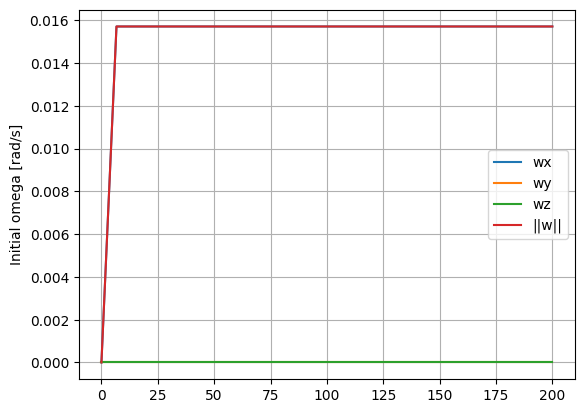

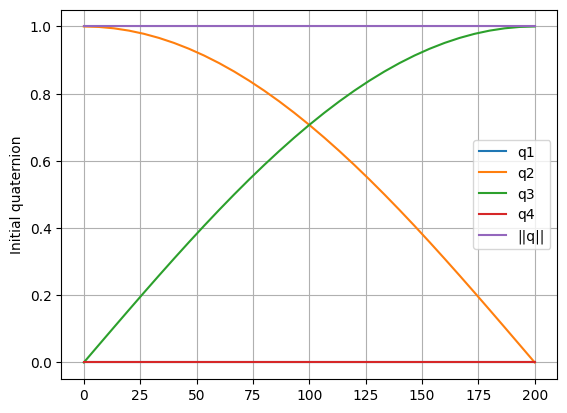

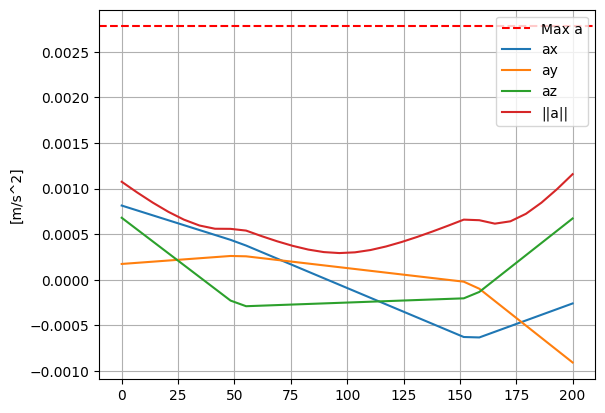

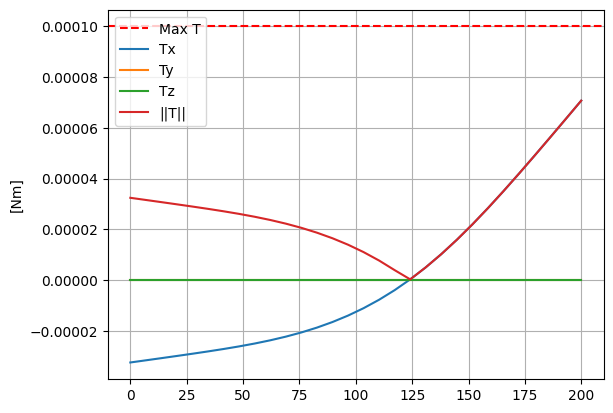

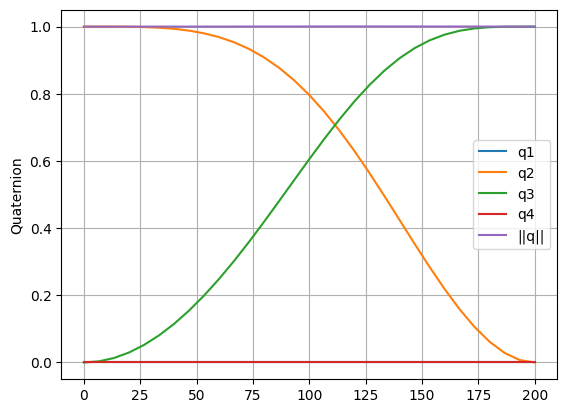

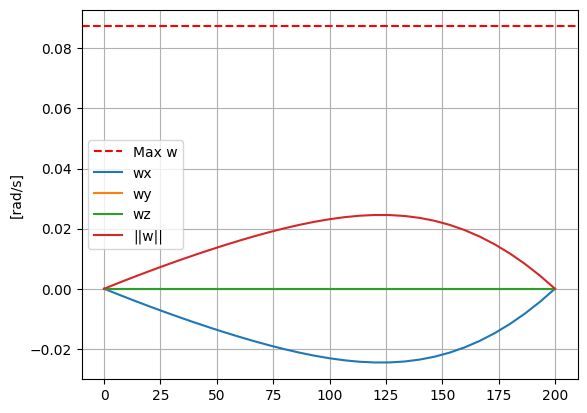

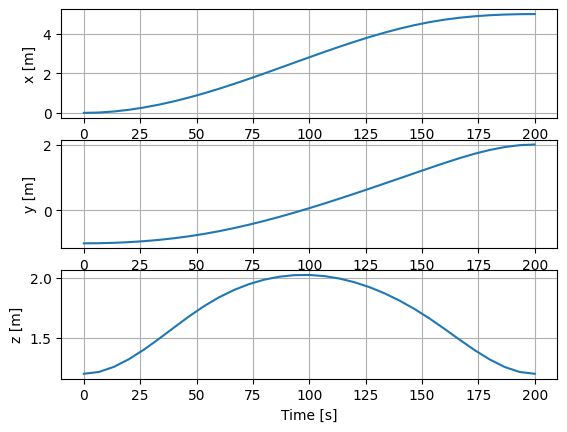

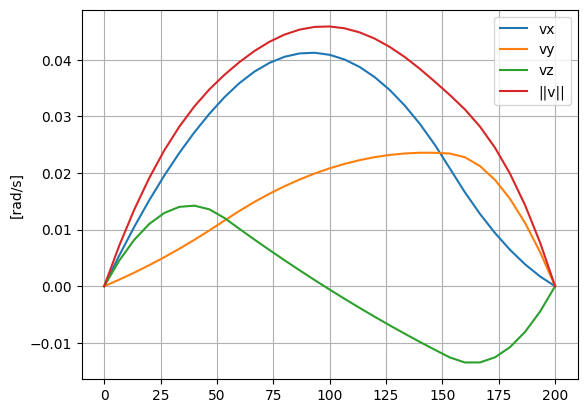

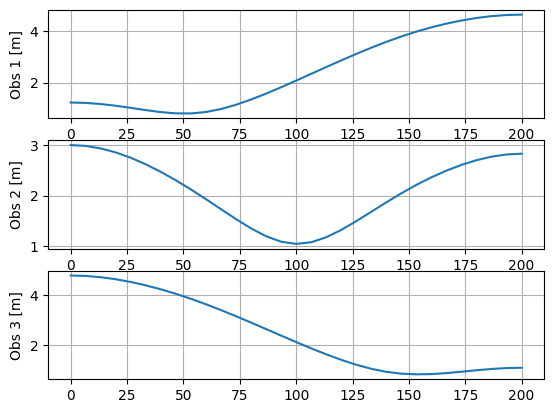

In [ ]:
u_value=np.copy(u_global)
nx_value=np.copy(x_global)

plt.figure(2)
plt.plot(np.linspace(0, tf, T+1), ox_angvel[0,:], label='wx')
plt.plot(np.linspace(0, tf, T+1), ox_angvel[1,:], label='wy')
plt.plot(np.linspace(0, tf, T+1), ox_angvel[2,:], label='wz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(ox_angvel,axis=0), label='||w||')
plt.ylabel('Initial omega [rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(np.linspace(0, tf, T+1), ox_quat[0,:], label='q1')
plt.plot(np.linspace(0, tf, T+1), ox_quat[1,:], label='q2')
plt.plot(np.linspace(0, tf, T+1), ox_quat[2,:], label='q3')
plt.plot(np.linspace(0, tf, T+1), ox_quat[3,:], label='q4')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(ox_quat,axis=0), label='||q||')
plt.ylabel('Initial quaternion')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(4)
plt.axhline(y=u_max_acc_double, color='r', linestyle='--', label='Max a')
plt.plot(np.linspace(0, tf, T), u_value[0,:], label='ax')
plt.plot(np.linspace(0, tf, T), u_value[1,:], label='ay')
plt.plot(np.linspace(0, tf, T), u_value[2,:], label='az')
plt.plot(np.linspace(0, tf, T), np.linalg.norm(u_value[0:3,:],axis=0), label='||a||')
plt.ylabel('[m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(5)
plt.axhline(y=u_max_torq_double, color='r', linestyle='--', label='Max T')
plt.plot(np.linspace(0, tf, T), u_value[3,:], label='Tx')
plt.plot(np.linspace(0, tf, T), u_value[4,:], label='Ty')
plt.plot(np.linspace(0, tf, T), u_value[5,:], label='Tz')
plt.plot(np.linspace(0, tf, T), np.linalg.norm(u_value[3:6,:],axis=0), label='||T||')
plt.ylabel('[Nm]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(6)
plt.plot(np.linspace(0, tf, T+1), nx_value[6,:], label='q1')
plt.plot(np.linspace(0, tf, T+1), nx_value[7,:], label='q2')
plt.plot(np.linspace(0, tf, T+1), nx_value[8,:], label='q3')
plt.plot(np.linspace(0, tf, T+1), nx_value[9,:], label='q4')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[6:10,:],axis=0), label='||q||')
plt.ylabel('Quaternion')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(7)
plt.axhline(y=omega_max_double, color='r', linestyle='--', label='Max w')
plt.plot(np.linspace(0, tf, T+1), nx_value[10,:], label='wx')
plt.plot(np.linspace(0, tf, T+1), nx_value[11,:], label='wy')
plt.plot(np.linspace(0, tf, T+1), nx_value[12,:], label='wz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[10:13,:],axis=0), label='||w||')
plt.ylabel('[rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(8)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[3,:])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[4,:])
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[5,:])
plt.xlabel('Time [s]')
plt.ylabel('z [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(9)
plt.plot(np.linspace(0, tf, T+1), nx_value[0,:], label='vx')
plt.plot(np.linspace(0, tf, T+1), nx_value[1,:], label='vy')
plt.plot(np.linspace(0, tf, T+1), nx_value[2,:], label='vz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[0:3,:],axis=0), label='||v||')
plt.ylabel('[rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(10)
plt.subplot(311)
pos_dron= nx_value[3:6,:]
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs1_double,axis=0))
plt.ylabel('Obs 1 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs2_double,axis=0))
plt.ylabel('Obs 2 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs3_double,axis=0))
plt.ylabel('Obs 3 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objs as go
from scipy.spatial.transform import Rotation as R

def create_cube(center, size, quaternion):
    """Creates a rotated cube using a quaternion."""
    half = size / 2.0
    vertices = np.array([  # Cube vertices
        [-half, -half, -half], [half, -half, -half], [half, half, -half], [-half, half, -half],
        [-half, -half, half], [half, -half, half], [half, half, half], [-half, half, half]
    ])

    # Apply rotation using quaternion
    r = R.from_quat(quaternion)
    rotated_vertices = r.apply(vertices) + center

    # Cube faces (each face as a set of 4 vertices)
    faces = [
        [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
        [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
    ]

    # Define mesh faces for the cube
    i_faces = [face[0] for face in faces]
    j_faces = [face[1] for face in faces]
    k_faces = [face[2] for face in faces]
    i_faces += [face[0] for face in faces]
    j_faces += [face[2] for face in faces]
    k_faces += [face[3] for face in faces]

    # Mesh3d for the cube (white cube)
    cube = go.Mesh3d(
        x=rotated_vertices[:, 0], y=rotated_vertices[:, 1], z=rotated_vertices[:, 2],
        i=i_faces, j=j_faces, k=k_faces, opacity=1.0, color='white'
    )

    # Create "eyes" (small blue circles) on the cube's faces
    eye_radius = 0.1
    eye_positions = [
        [half,0.13,0], [half,-0.13,0]
    ]

    # Apply rotation to eye positions
    rotated_eye_positions = r.apply(eye_positions) + center

    eye_spheres = []
    for pos in rotated_eye_positions:
        u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:5j]
        x_eye = eye_radius * np.cos(u) * np.sin(v) + pos[0]
        y_eye = eye_radius * np.sin(u) * np.sin(v) + pos[1]
        z_eye = eye_radius * np.cos(v) + pos[2]

        # Crear una matriz de color uniforme (por ejemplo, azul con un solo valor)
        color_value = np.full_like(x_eye, 0.5)  # 0.5 es un tono de azul en la escala

        eye_spheres.append(go.Surface(
            x=x_eye, y=y_eye, z=z_eye, surfacecolor=color_value,
            colorscale=[[0, 'deepskyblue'], [1, 'deepskyblue']], opacity=1.0, showscale=False
        ))

    return cube, eye_spheres

def create_spheres(spheres):
    """Creates spheres as surfaces."""
    sphere_traces = []
    for sphere in spheres:
        h, rc = sphere['h'], sphere['rc']
        u, v = np.mgrid[0:2*np.pi:16j, 0:np.pi:8j]
        x_sphere = rc * np.cos(u) * np.sin(v) + h[0]
        y_sphere = rc * np.sin(u) * np.sin(v) + h[1]
        z_sphere = rc * np.cos(v) + h[2]
        sphere_traces.append(go.Surface(
            x=x_sphere, y=y_sphere, z=z_sphere, colorscale='Reds', opacity=0.3, showscale=False
        ))
    return sphere_traces

def plot_3d_trajectory_with_cube(nx_value, spheres):
    quaternions = nx_value[6:10, :]
    x_traj, y_traj, z_traj = nx_value[3, :], nx_value[4, :], nx_value[5, :]

    trace_trajectory = go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                                    line=dict(color='blue', width=2))

    # Set axis limits with uniform scaling
    padding = 0.5
    max_range = max(max(x_traj) - min(x_traj), max(y_traj) - min(y_traj), max(z_traj) - min(z_traj)) / 2
    mid_x, mid_y, mid_z = (max(x_traj) + min(x_traj)) / 2, (max(y_traj) + min(y_traj)) / 2, (max(z_traj) + min(z_traj)) / 2
    x_range = [mid_x - max_range - padding, mid_x + max_range + padding]
    y_range = [mid_y - max_range - padding, mid_y + max_range + padding]
    z_range = [mid_z - max_range - padding, mid_z + max_range + padding]

    # Initial cube (white with blue eyes)
    cube, eye_spheres = create_cube([x_traj[0], y_traj[0], z_traj[0]], 0.5, quaternions[:, 0])

    # Initial spheres
    sphere_traces = create_spheres(spheres)

    # Animation frames
    frames = [
        go.Frame(data=[
            go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                         marker=dict(size=2, color='blue')),
            create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[0],
        ] + create_spheres(spheres) + create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[1])
        for k in range(len(x_traj))
    ]

    layout = go.Layout(
        title='Astrobee guidance via SCvx (ECOS, CVXpygen)',
        scene=dict(
            xaxis_title='x', yaxis_title='y', zaxis_title='z',
            xaxis=dict(range=x_range, autorange=False),
            yaxis=dict(range=y_range, autorange=False),
            zaxis=dict(range=z_range, autorange=False),
            aspectmode='cube',  # Ensures correct proportions
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))  # Adjust camera view for better visibility
        ),
        updatemenus=[dict(type='buttons', buttons=[dict(label='Play', method='animate',
                                                       args=[None, dict(frame=dict(duration=50, redraw=True),
                                                                        fromcurrent=True)])])])

    fig = go.Figure(data=[trace_trajectory, cube] + sphere_traces + eye_spheres, layout=layout, frames=frames)
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_cube(nx_value, spheres)


In [ ]:
print(np.linalg.norm(vc.value))

2.867849686793668e-15


# GuSTO Astrobee (ECOS working)

In [ ]:
!pip install ecos

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time
import math

print("numpy version",np.__version__)
print("cvxpy version",cp.__version__)

T = 31-1 # 101-1 representa 101 puntos de discretización
tf = 200.0
tau = tf/(T)

#Kinematics and dynamics

start_xyz=np.array([[0.0],[-1.0],[1.2]])
end_xyz=np.array([[5.0],[2.0],[1.2]])

start_quat=np.array([[0],[0],[0],[1]])
#end_quat=np.array([[0.3**0.5],[0.4**0.5],[0.1**0.5],[0.2**0.5]])
#end_quat=np.array([[0],[0],[0],[1]])
#end_quat=np.array([[0],[0],[1],[0]])
end_quat=np.array([[1],[0],[0],[0]])

startpos=np.block([[0.0],[0.0],[0.0],[start_xyz],[start_quat],[0],[0],[0]])
endpos=np.block([[0.0],[0.0],[0.0],[end_xyz],[end_quat],[0],[0],[0]])

c_obs1_double = np.array([[1.1],[-0.5],[1]])
c_obs2_double = np.array([[2.6],[0.5],[1.1]])
c_obs3_double = np.array([[4],[1.6],[1.2]])

d_obs1_double = 0.8
d_obs2_double = 0.8
d_obs3_double = 0.8

J1_double=0.1083
J2_double=0.1083
J3_double=0.1083

u_max_acc_double = 20/7.2*0.001
#u_max_torq_double = 100*0.0000002
u_max_torq_double = 100*0.000001

vel_max_double = 0.4
#omega_max_double = 3.0*np.pi/180
omega_max_double = 0.021

A = np.array([[0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]])
B = np.vstack((np.eye(3), np.zeros((3, 3))))

#Guidance parameters
lambda_0=10**4
lambda_max=10**9
etta_double=5

rho0=0.1
rho1=0.9

etta0=0.001
etta1=10

lamb_double=lambda_0
sqrt_lamb_double=np.sqrt(lambda_0)
etta_double=10
obs_tol_double=0.005 #5mm (useful for lambda_update)

beta_sh=2
beta_gr=2

gamma_fail=5
mu=0.8
k_star=6

e_tol=0.024 #stopping threshold related to Delta_u
epsilon_r=0.05 #stopping threshold related to Delta_J

trapz_Deltau=100000 #Big initial value
J_GuSTO_stop=100000 #Big initial value
J_lamb_old=1 #Initial value (1 recommended)

u_CW_scaling=np.array([[1/u_max_acc_double,0,0],[0,1/u_max_acc_double,0],[0,0,1/u_max_acc_double]])
u_qw_scaling=np.array([[1/u_max_torq_double,0,0],[0,1/u_max_torq_double,0],[0,0,1/u_max_torq_double]])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 4.0 MB/s eta 0:00:00
numpy version 2.0.2
cvxpy version 1.6.4


In [ ]:
nx = cp.Variable((13, T + 1), name='nx')
u = cp.Variable((6, T), name='u')

startpos_cvxpy = cp.Parameter((13,1), name='startpos_cvxpy')
endpos_cvxpy = cp.Parameter((13,1), name='endpos_cvxpy')

ox_aux = cp.Parameter((13,T + 1), name='ox_aux')
ox_cvxpy = cp.Parameter((13,T + 1), name='ox_cvxpy')

aux_a_obs1 = cp.Parameter((T+1,1), name='aux_a_obs1')
aux_b_obs1 = cp.Parameter((T+1,3), name='aux_b_obs1')

aux_a_obs2 = cp.Parameter((T+1,1), name='aux_a_obs2')
aux_b_obs2 = cp.Parameter((T+1,3), name='aux_b_obs2')

aux_a_obs3 = cp.Parameter((T+1,1), name='aux_a_obs3')
aux_b_obs3 = cp.Parameter((T+1,3), name='aux_b_obs3')

A_discrete_CW = cp.Parameter((6,6), name='A_discrete_CW')
B_discrete_CW_scaled = cp.Parameter((6,3), name='B_discrete_CW_scaled')

A_discrete_qw = cp.Parameter((7,7*T), name='A_discrete_qw')
B_discrete_qw_scaled = cp.Parameter((7,3*T), name='B_discrete_qw_scaled')
w_discrete_qw = cp.Parameter((7,T), name='w_discrete_qw')

sqrt_lamb = cp.Parameter(name='sqrt_lamb')
sqrtlamb_etta = cp.Parameter(name='sqrtlamb_etta')

a_max = cp.Parameter(name='a_max')
aux_g = cp.Parameter((6,1), name='aux_g')

sqrt_lamb_vel_max = cp.Parameter(name='sqrt_lamb_vel_max')
sqrt_lamb_omega_max = cp.Parameter(name='sqrt_lamb_omega_max')

constraints = [
    nx[:, 0] == startpos_cvxpy[:,0],
    nx[:, T] == endpos_cvxpy[:,0],
]
cost = 0

for k in range(0, T): # from 0 to T-1
    constraints += [nx[0:6, k+1] == A_discrete_CW @ nx[0:6, k] + B_discrete_CW_scaled @ (u[0:3, k])]
    constraints += [nx[6:13, k+1] == A_discrete_qw[:,7*k:7*k+7] @ nx[6:13, k] + B_discrete_qw_scaled[:,3*k:3*k+3] @ (u[3:6, k]) + w_discrete_qw[:,k]]

    constraints += [cp.norm(u[0:3, k], 2) <= 1]
    constraints += [cp.norm(u[3:6, k], 2) <= 1]

    cost += tau*cp.sum_squares(u[0:3,k])
    cost += tau*cp.sum_squares(u[3:6,k])

for k in range(0, T+1):
    cost += tau*cp.power(cp.pos(cp.sum([cp.norm(sqrt_lamb*nx[:, k]-ox_aux[:,k],'inf'),-sqrtlamb_etta])),2) #g_tr

    cost += tau*cp.power(cp.pos(aux_a_obs1[k,0]+aux_b_obs1[k,:]@nx[3:6, k]),2) #sum_n_s obs 1
    cost += tau*cp.power(cp.pos(aux_a_obs2[k,0]+aux_b_obs2[k,:]@nx[3:6, k]),2) #sum_n_s obs 2
    cost += tau*cp.power(cp.pos(aux_a_obs3[k,0]+aux_b_obs3[k,:]@nx[3:6, k]),2) #sum_n_s obs 3

    cost += tau*cp.power(cp.pos(cp.norm(sqrt_lamb*nx[0:3,k:k+1], 2)-sqrt_lamb_vel_max),2) #sum_nw v<=v_max
    cost += tau*cp.power(cp.pos(cp.norm(sqrt_lamb*nx[10:13,k:k+1], 2)-sqrt_lamb_omega_max),2) #sum_nw w<=w_max
objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [ ]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [ ]:
aux_aux_a_obs1 = np.zeros((T+1,1))
aux_aux_b_obs1 = np.zeros((T+1,3))

aux_aux_a_obs2 = np.zeros((T+1,1))
aux_aux_b_obs2 = np.zeros((T+1,3))

aux_aux_a_obs3 = np.zeros((T+1,1))
aux_aux_b_obs3 = np.zeros((T+1,3))

aux_A_discrete_qw = np.zeros((7,7*T))
aux_B_discrete_qw_scaled = np.zeros((7,3*T))
aux_w_discrete_qw = np.zeros((7,T))

In [ ]:
from scipy.spatial.transform import Rotation as R, Slerp

def scaling_begin(u,u_scaling,T):
    for k in range(0, T):
        u[:,k:k+1]=u_scaling@u[:,k:k+1]
    return u
def scaling_end(u,u_scaling,T):
    for k in range(0, T):
        u[:,k:k+1]=np.linalg.inv(u_scaling)@u[:,k:k+1]
    return u
def slerp(q1, q2, num_samples):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)

    if np.abs(theta_0) < 1e-6:
        return np.linspace(q1, q2, num_samples)

    sin_theta_0 = np.sin(theta_0)

    quaternions = []
    for i in range(num_samples):
        t = i / (num_samples - 1)
        theta = theta_0 * t
        sin_theta = np.sin(theta)
        s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
        s1 = sin_theta / sin_theta_0
        quaternions.append(s0 * q1 + s1 * q2)

    return np.array(quaternions)

def compute_angular_velocity(quaternions, dt):

    rotations = R.from_quat(quaternions)
    angular_velocities = [[0,0,0]]

    for i in range(len(rotations) - 1):
        delta_rot = rotations[i + 1] * rotations[i].inv()
        log_rot = delta_rot.as_rotvec() / dt
        angular_velocities.append(log_rot)

    return np.array(angular_velocities)

def exp_matrix_taylor_A(A,h,n):
    size_n,size_aux=np.shape(A)
    sum=np.eye(size_n)+A*h
    for i in range(2,n+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(h*A,i)
    return sum

def exp_matrix_taylor_B(A,B,h,n):
    size_n,size_aux=np.shape(A)
    sum=h*np.eye(size_n)
    for i in range(2,n+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(A,i-1)*h**i
    return sum@B

def f_qw(x,u):
    aux_f=np.zeros((7,1))

    oq1=x[0,0]
    oq2=x[1,0]
    oq3=x[2,0]
    oq4=x[3,0]
    ow1=x[4,0]
    ow2=x[5,0]
    ow3=x[6,0]

    ou1=u[0,0]
    ou2=u[1,0]
    ou3=u[2,0]

    aux_f[0,0]=0.5*(oq4*ow1-oq3*ow2+oq2*ow3)
    aux_f[1,0]=0.5*(oq3*ow1+oq4*ow2-oq1*ow3)
    aux_f[2,0]=0.5*(-oq2*ow1+oq1*ow2+oq4*ow3)
    aux_f[3,0]=0.5*(-oq1*ow1-oq2*ow2-oq3*ow3)

    aux_f[4,0]=(1/J1_double)*(-(J3_double-J2_double)*ow2*ow3+ou1)
    aux_f[5,0]=(1/J2_double)*(-(J1_double-J3_double)*ow3*ow1+ou2)
    aux_f[6,0]=(1/J3_double)*(-(J2_double-J1_double)*ow1*ow2+ou3)
    return aux_f

def A_qw(oxqw):
  oq1=oxqw[0,0]
  oq2=oxqw[1,0]
  oq3=oxqw[2,0]
  oq4=oxqw[3,0]
  ow1=oxqw[4,0]
  ow2=oxqw[5,0]
  ow3=oxqw[6,0]
  aux_A_qw=np.zeros((7,7))
  aux_A_qw[0:4,:]=0.5*np.array([[0,ow3,-ow2,ow1,oq4,-oq3,oq2],
                            [-ow3,0,ow1,ow2,oq3,oq4,-oq1],
                            [ow2,-ow1,0,ow3,-oq2,oq1,oq4],
                            [-ow1,-ow2,-ow3,0,-oq1,-oq2,-oq3]])
  aux_A_qw[4:7,:] = np.array([
                     [0,0,0,0,0,1/J1_double*(-(J3_double-J2_double)*ow3),1/J1_double*(-(J3_double-J2_double)*ow2)],
                     [0,0,0,0,1/J2_double*(-(J1_double-J3_double)*ow3),0,1/J2_double*(-(J1_double-J3_double)*ow1)],
                     [0,0,0,0,1/J3_double*(-(J2_double-J1_double)*ow2),1/J3_double*(-(J2_double-J1_double)*ow1),0]])
  return aux_A_qw
def B_qw(oxqw):
  aux_B_qw = np.block([[np.zeros((4,3))],[1/J1_double,0,0],[0,1/J2_double,0],[0,0,1/J3_double]])
  return aux_B_qw
def w_qw(oxqw,ou):
  aux_w_qw=f_qw(oxqw,ou)-A_qw(oxqw)@oxqw
  return aux_w_qw

ox_pos = np.column_stack((np.array([np.linspace(startpos[3,0], endpos[3,0], T+1), np.linspace(startpos[4,0], endpos[4,0], T+1),np.linspace(startpos[5,0], endpos[5,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T + 1):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau

ox_quat = slerp(startpos[6:10,0], endpos[6:10,0],T+1).T
ox_angvel = compute_angular_velocity(ox_quat.T, tau).T

ox=np.zeros((13,T+1))
ox[0:6,:]=np.block([[ox_vel],[ox_pos]])
ox[6:10,:]=ox_quat
ox[10:13,:]=ox_angvel

ou=np.zeros((6,T))

A_discrete_CW.value = exp_matrix_taylor_A(A,tau,7)
B_discrete_CW_scaled.value = exp_matrix_taylor_B(A,B@np.linalg.inv(u_CW_scaling),tau,7)

sqrt_lamb_vel_max.value=lamb_double**0.5*vel_max_double
sqrt_lamb_omega_max.value=lamb_double**0.5*omega_max_double

In [ ]:
def h_lambda(z):
  if z>=0:
    return lamb_double*z**2
  if z<0:
    return 0
def lamb_update(lamb,x_opt,T):
    obs1_bool=True
    obs2_bool=True
    obs3_bool=True
    wmax_bool=True
    vmax_bool=True
    for k in range(0,T+1,1):
        obs1_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs1_double,ord=2)>=d_obs1_double-obs_tol_double) and obs1_bool #obs1
        obs2_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs2_double,ord=2)>=d_obs2_double-obs_tol_double) and obs2_bool #obs2
        obs3_bool=(np.linalg.norm(x_opt[3:6,k:k+1]-c_obs3_double,ord=2)>=d_obs3_double-obs_tol_double) and obs3_bool #obs3

        vmax_bool=(np.linalg.norm(x_opt[0:3,k:k+1])<=vel_max_double) and vmax_bool #v<=vmax
        wmax_bool=(np.linalg.norm(x_opt[10:13,k:k+1])<=omega_max_double) and wmax_bool #w<=wmax

        if not(obs1_bool) or not(obs2_bool) or not(obs3_bool) or not(wmax_bool) or not(vmax_bool):
            break;
    if obs1_bool and obs2_bool and obs3_bool and vmax_bool and wmax_bool:
        return lambda_0
    else:
        return gamma_fail*lamb

def sum_x_star_and_Theta_star(x_opt,u_opt,T):
    dx_k_star=np.zeros((13,1))
    A_discrete_CW_GuSTO=exp_matrix_taylor_A(A,tau,7)
    B_discrete_CW_GuSTO=exp_matrix_taylor_B(A,B@np.linalg.inv(u_CW_scaling),tau,7)

    sum_x=0
    Theta_sum=0

    for k in range(0,T,1):
        A_qw_c = A_qw(x_opt[6:13, k:k+1]) #continuous time
        B_qw_c = B_qw(x_opt[6:13,k:k+1])@np.linalg.inv(u_qw_scaling) #continuous time
        w_qw_c = w_qw(x_opt[6:13,k:k+1],np.zeros((3,1))) #continuous time

        dx_k_star[0:6,:]=A@x_opt[0:6, k:k+1]+B@np.linalg.inv(u_CW_scaling)@u_opt[0:3, k:k+1]
        dx_k_star[6:13,:]=A_qw_c @ x_opt[6:13, k:k+1] + B_qw_c @ np.linalg.inv(u_qw_scaling) @ (u_opt[3:6, k:k+1]) + w_qw_c

        sum_x+=tau*np.linalg.norm(dx_k_star,ord=2)

        u_opt[0:3,:] = scaling_end(u_opt[0:3,:],u_CW_scaling,T) #scaling end
        u_opt[3:6,:] = scaling_end(u_opt[3:6,:],u_qw_scaling,T) #scaling end
        Theta_sum+=tau*np.linalg.norm(np.block([[np.zeros((6,1))],[f_qw(x_opt[6:13, k:k+1],u_opt[3:6, k:k+1])]])-dx_k_star,ord=2)
        u_opt[0:3,:] = scaling_begin(u_opt[0:3,:],u_CW_scaling,T) #scaling begin
        u_opt[3:6,:] = scaling_begin(u_opt[3:6,:],u_qw_scaling,T) #scaling begin

    return [sum_x,Theta_sum]
def J_lamb_GuSTO(x,u,etta,T):
    cost1 = 0
    cost2 = 0
    cost3 = 0
    for k in range(0, T): # from 0 to T-1
        cost1+=tau*np.linalg.norm(u[:,k:k+1], ord=2)**2
    for k in range(0, T+1):
        cost2 += tau*h_lambda(np.linalg.norm(x[:,k:k+1]-ox[:,k:k+1], ord=np.inf)-etta)
    for k in range(0, T+1):
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs1_double, ord=2)+d_obs1_double)
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs2_double, ord=2)+d_obs2_double)
        cost3 += tau*h_lambda(-np.linalg.norm(x[3:6,k:k+1]-c_obs3_double, ord=2)+d_obs3_double)

        cost3 += tau*h_lambda(np.linalg.norm(x[0:3,k:k+1], ord=2)-vel_max_double) #sum_nw v<=v_max
        cost3 += tau*h_lambda(np.linalg.norm(x[10:13,k:k+1], ord=2)-omega_max_double) #sum_nw w<=w_max

    return cost1+cost2+cost3

startpos_cvxpy.value=np.copy(startpos)
endpos_cvxpy.value=np.copy(endpos)

t0 = time.time()

lamb_double = lamb_double
sqrt_lamb.value = (lamb_double)**0.5
etta_double = etta_double
sqrtlamb_etta.value = (lamb_double)**0.5*etta_double

ox_cvxpy.value = np.copy(ox) #trajectory initialization (control)
ox_aux.value = (lamb_double)**0.5*ox

ou = np.zeros((6,T)) #trajectory initialization (input)

ou[0:3,:] = scaling_begin(ou[0:3,:],u_CW_scaling,T) #scaling begin
ou[3:6,:] = scaling_begin(ou[3:6,:],u_qw_scaling,T) #scaling begin

i=1
while True:
    if lamb_double>lambda_max or (trapz_Deltau<e_tol) or J_GuSTO_stop<epsilon_r:
        u_global = ou
        x_global = ox
        u_global[0:3,:] = scaling_end(u_global[0:3,:],u_CW_scaling,T) #scaling end
        u_global[3:6,:] = scaling_end(u_global[3:6,:],u_qw_scaling,T) #scaling end
        trapz_Deltau=100000 #Big initial value
        J_GuSTO_stop=100000 #Big initial value
        break;

    ou[0:3,:] = scaling_end(ou[0:3,:],u_CW_scaling,T) #scaling end
    ou[3:6,:] = scaling_end(ou[3:6,:],u_qw_scaling,T) #scaling end

    for k in range(0, T):
        aux_A_discrete_qw[0:7,7*k:7*k+7] = exp_matrix_taylor_A(A_qw(ox[6:13,k:k+1]),tau,7)
        aux_B_discrete_qw_scaled[0:7,3*k:3*k+3] = exp_matrix_taylor_B(A_qw(ox[6:13,k:k+1]),B_qw(ox[6:13,k:k+1])@np.linalg.inv(u_qw_scaling),tau,7)
        aux_w_discrete_qw[0:7,k:k+1] = exp_matrix_taylor_B(A_qw(ox[6:13,k:k+1]),w_qw(ox[6:13,k:k+1],np.zeros((3,1))),tau,7)

    A_discrete_qw.value = np.copy(aux_A_discrete_qw)
    B_discrete_qw_scaled.value = np.copy(aux_B_discrete_qw_scaled)
    w_discrete_qw.value = np.copy(aux_w_discrete_qw)

    for k in range(0,T+1,1):
        aux_aux_a_obs1[k,0] = -np.sqrt(lamb_double)*np.linalg.norm(ox[3:6,k]-c_obs1_double[:,0],2)+np.sqrt(lamb_double)*d_obs1_double+np.sqrt(lamb_double)*(ox[3:6,k]-c_obs1_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs1_double[:,0],2))@ox[3:6,k]
        aux_aux_b_obs1[k:k+1,:] = -np.sqrt(lamb_double)*(ox[3:6,k]-c_obs1_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs1_double[:,0],2))

        aux_aux_a_obs2[k,0] = -np.sqrt(lamb_double)*np.linalg.norm(ox[3:6,k]-c_obs2_double[:,0],2)+np.sqrt(lamb_double)*d_obs2_double+np.sqrt(lamb_double)*(ox[3:6,k]-c_obs2_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs2_double[:,0],2))@ox[3:6,k]
        aux_aux_b_obs2[k:k+1,:] = -np.sqrt(lamb_double)*(ox[3:6,k]-c_obs2_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs2_double[:,0],2))

        aux_aux_a_obs3[k,0] = -np.sqrt(lamb_double)*np.linalg.norm(ox[3:6,k]-c_obs3_double[:,0],2)+np.sqrt(lamb_double)*d_obs3_double+np.sqrt(lamb_double)*(ox[3:6,k]-c_obs3_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs3_double[:,0],2))@ox[3:6,k]
        aux_aux_b_obs3[k:k+1,:] = -np.sqrt(lamb_double)*(ox[3:6,k]-c_obs3_double[:,0]).T/(np.linalg.norm(ox[3:6,k]-c_obs3_double[:,0],2))

    aux_a_obs1.value=np.copy(aux_aux_a_obs1)
    aux_b_obs1.value=np.copy(aux_aux_b_obs1)

    aux_a_obs2.value=np.copy(aux_aux_a_obs2)
    aux_b_obs2.value=np.copy(aux_aux_b_obs2)

    aux_a_obs3.value=np.copy(aux_aux_a_obs3)
    aux_b_obs3.value=np.copy(aux_aux_b_obs3)

    val = problem.solve(solver='ECOS', ignore_dpp=True)
    L_lambda=val
    x_opt = nx.value
    u_opt = u.value

    ou[0:3,:] = scaling_begin(ou[0:3,:],u_CW_scaling,T) #scaling begin
    ou[3:6,:] = scaling_begin(ou[3:6,:],u_qw_scaling,T) #scaling begin

    trapz_Deltau=0
    for k in range(0,T,1):
        trapz_Deltau+=tau*np.linalg.norm(u_opt[:, k:k+1]-ou[:, k:k+1], ord=np.inf)

    J_lamb_opt=J_lamb_GuSTO(x_opt,u_opt,etta_double,T)
    J_GuSTO_stop=np.abs(J_lamb_old-J_lamb_opt)/np.abs(J_lamb_old)

    flag_case4=True
    for k in range(0,T+1,1):
        if np.linalg.norm(x_opt[:, k:k+1]-ox[:, k:k+1], ord=np.inf)>etta_double:
            print("Case 4")
            etta_double=etta_double
            ox=ox
            ou=ou
            lamb_double=gamma_fail*lamb_double
            flag_case4=False
            break;

    if flag_case4:
      sum_x_star, Theta_star = sum_x_star_and_Theta_star(x_opt,u_opt,T)
      rho_i=(abs(J_lamb_opt-L_lambda)+Theta_star)/(abs(L_lambda)+sum_x_star)
      print("J_lamb_GuSTO: ",J_lamb_GuSTO(x_opt,u_opt,etta_double,T)," L_lambda: ",L_lambda," rho:",rho_i)
      if rho_i<rho0:
          etta_double=min([etta1,beta_gr*etta_double])
          ox = np.copy(x_opt)
          ou = np.copy(u_opt)
          lamb_double=lamb_update(lamb_double,x_opt,T)
          print("Case 1")
      if rho_i>=rho0 and rho_i<rho1:
          etta_double=etta_double
          ox = np.copy(x_opt)
          ou = np.copy(u_opt)
          lamb_double=lamb_update(lamb_double,x_opt,T)
          print("Case 2")
      if rho_i>=rho1:
          etta_double=max([etta0,etta_double/beta_sh])
          ox=np.copy(ox)
          ou=np.copy(ou)
          lamb_double=lamb_double
          print("Case 3")

    sqrtlamb_etta.value = (lamb_double)**0.5*etta_double

    ox_aux.value = (lamb_double)**0.5*ox
    sqrt_lamb.value=(lamb_double)**0.5
    sqrt_lamb_vel_max.value=(lamb_double)**0.5*vel_max_double
    sqrt_lamb_omega_max.value=(lamb_double)**0.5*omega_max_double

    J_lamb_old=J_lamb_GuSTO(ox,ou,etta_double,T)
    print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta_double,"Lambda: ",lamb_double,"Trap_Du: ",trapz_Deltau, "J_stop: ",J_GuSTO_stop)
    i=i+1

t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

J_lamb_GuSTO:  55.76692278169659  L_lambda:  55.77628998371364  rho: 0.11874377525048842
Case 2
 Iteration number:  1  Cost function:  55.77628998371364  Etta:  10 Lambda:  50000 Trap_Du:  75.59886137040621 J_stop:  54.76692278169658
J_lamb_GuSTO:  32.75934951320231  L_lambda:  32.75954092803083  rho: 0.16618918770561333
Case 2
 Iteration number:  2  Cost function:  32.75954092803083  Etta:  10 Lambda:  250000 Trap_Du:  42.30669878703218 J_stop:  0.4280458554739287
J_lamb_GuSTO:  32.60913590396174  L_lambda:  32.60915117190244  rho: 0.1624612933153327
Case 2
 Iteration number:  3  Cost function:  32.60915117190244  Etta:  10 Lambda:  1250000 Trap_Du:  10.055426506457914 J_stop:  0.015288063232450227

CVXPY
Solve time: 8691.986 ms


/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


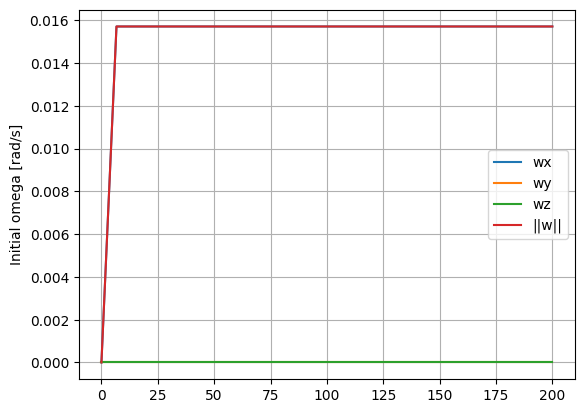

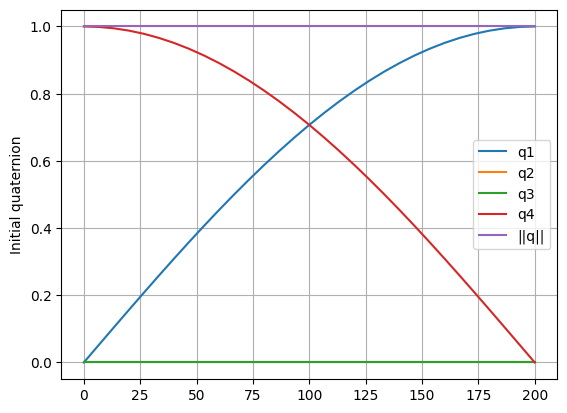

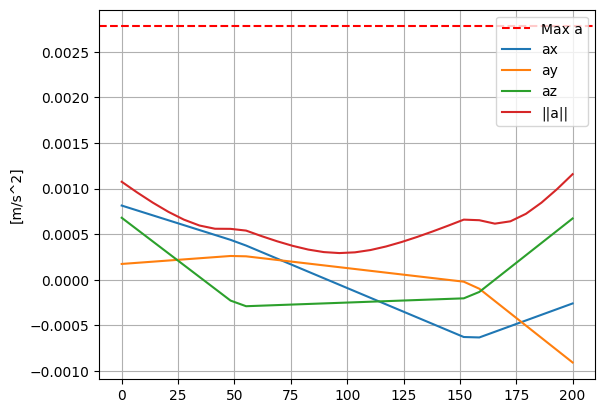

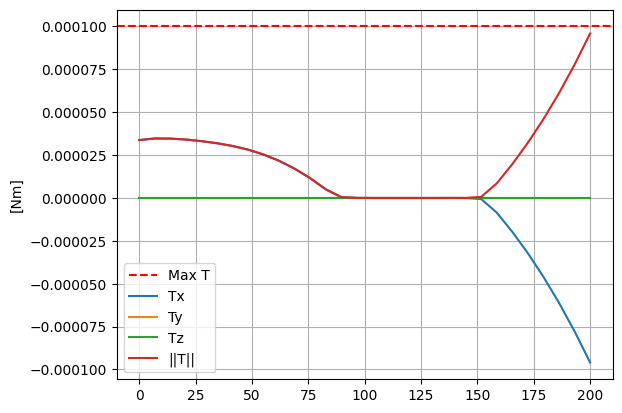

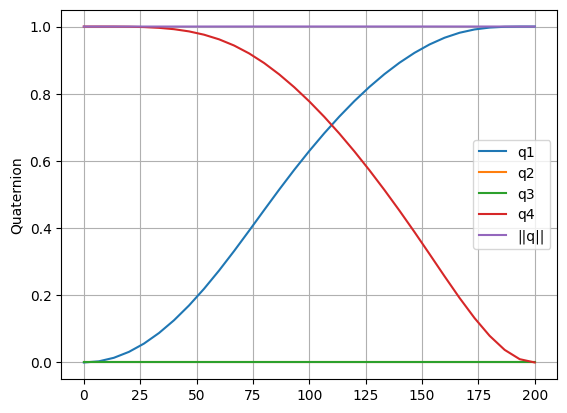

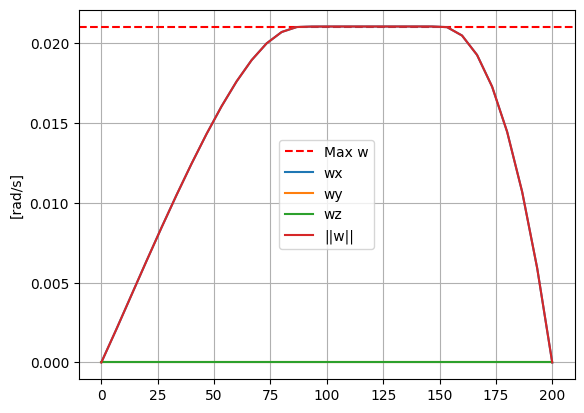

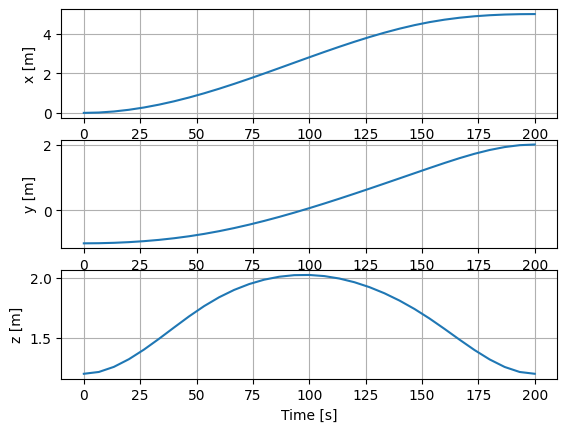

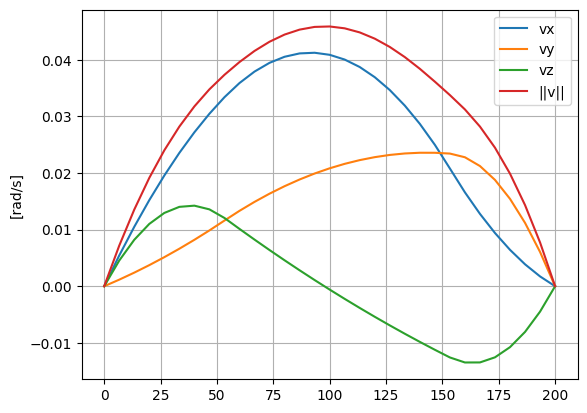

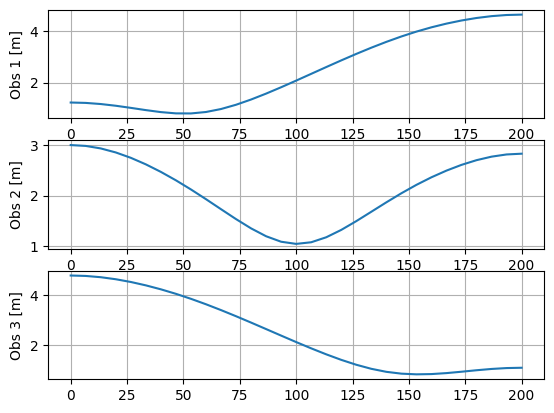

In [ ]:
u_value=np.copy(u_global)
nx_value=np.copy(x_global)

plt.figure(2)
plt.plot(np.linspace(0, tf, T+1), ox_angvel[0,:], label='wx')
plt.plot(np.linspace(0, tf, T+1), ox_angvel[1,:], label='wy')
plt.plot(np.linspace(0, tf, T+1), ox_angvel[2,:], label='wz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(ox_angvel,axis=0), label='||w||')
plt.ylabel('Initial omega [rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(np.linspace(0, tf, T+1), ox_quat[0,:], label='q1')
plt.plot(np.linspace(0, tf, T+1), ox_quat[1,:], label='q2')
plt.plot(np.linspace(0, tf, T+1), ox_quat[2,:], label='q3')
plt.plot(np.linspace(0, tf, T+1), ox_quat[3,:], label='q4')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(ox_quat,axis=0), label='||q||')
plt.ylabel('Initial quaternion')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(4)
plt.axhline(y=u_max_acc_double, color='r', linestyle='--', label='Max a')
plt.plot(np.linspace(0, tf, T), u_value[0,:], label='ax')
plt.plot(np.linspace(0, tf, T), u_value[1,:], label='ay')
plt.plot(np.linspace(0, tf, T), u_value[2,:], label='az')
plt.plot(np.linspace(0, tf, T), np.linalg.norm(u_value[0:3,:],axis=0), label='||a||')
plt.ylabel('[m/s^2]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(5)
plt.axhline(y=u_max_torq_double, color='r', linestyle='--', label='Max T')
plt.plot(np.linspace(0, tf, T), u_value[3,:], label='Tx')
plt.plot(np.linspace(0, tf, T), u_value[4,:], label='Ty')
plt.plot(np.linspace(0, tf, T), u_value[5,:], label='Tz')
plt.plot(np.linspace(0, tf, T), np.linalg.norm(u_value[3:6,:],axis=0), label='||T||')
plt.ylabel('[Nm]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(6)
plt.plot(np.linspace(0, tf, T+1), nx_value[6,:], label='q1')
plt.plot(np.linspace(0, tf, T+1), nx_value[7,:], label='q2')
plt.plot(np.linspace(0, tf, T+1), nx_value[8,:], label='q3')
plt.plot(np.linspace(0, tf, T+1), nx_value[9,:], label='q4')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[6:10,:],axis=0), label='||q||')
plt.ylabel('Quaternion')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(7)
plt.axhline(y=omega_max_double, color='r', linestyle='--', label='Max w')
plt.plot(np.linspace(0, tf, T+1), nx_value[10,:], label='wx')
plt.plot(np.linspace(0, tf, T+1), nx_value[11,:], label='wy')
plt.plot(np.linspace(0, tf, T+1), nx_value[12,:], label='wz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[10:13,:],axis=0), label='||w||')
plt.ylabel('[rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(8)
plt.subplot(311)
plt.plot(np.linspace(0, tf, T+1), nx_value[3,:])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), nx_value[4,:])
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), nx_value[5,:])
plt.xlabel('Time [s]')
plt.ylabel('z [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.figure(9)
plt.plot(np.linspace(0, tf, T+1), nx_value[0,:], label='vx')
plt.plot(np.linspace(0, tf, T+1), nx_value[1,:], label='vy')
plt.plot(np.linspace(0, tf, T+1), nx_value[2,:], label='vz')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(nx_value[0:3,:],axis=0), label='||v||')
plt.ylabel('[rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(10)
plt.subplot(311)
pos_dron= nx_value[3:6,:]
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs1_double,axis=0))
plt.ylabel('Obs 1 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(312)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs2_double,axis=0))
plt.ylabel('Obs 2 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)
plt.subplot(313)
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(pos_dron-c_obs3_double,axis=0))
plt.ylabel('Obs 3 [m]')
plt.gca().tick_params(labelsize=10)
plt.grid(True)

plt.show()
u_global[0:3,:] = scaling_begin(u_global[0:3,:],u_CW_scaling,T) #scaling begin
u_global[3:6,:] = scaling_begin(u_global[3:6,:],u_qw_scaling,T) #scaling begin

In [ ]:
import numpy as np
import plotly.graph_objs as go
from scipy.spatial.transform import Rotation as R

def create_cube(center, size, quaternion):
    """Creates a rotated cube using a quaternion."""
    half = size / 2.0
    vertices = np.array([  # Cube vertices
        [-half, -half, -half], [half, -half, -half], [half, half, -half], [-half, half, -half],
        [-half, -half, half], [half, -half, half], [half, half, half], [-half, half, half]
    ])

    # Apply rotation using quaternion
    r = R.from_quat(quaternion)
    rotated_vertices = r.apply(vertices) + center

    # Cube faces (each face as a set of 4 vertices)
    faces = [
        [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
        [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
    ]

    # Define mesh faces for the cube
    i_faces = [face[0] for face in faces]
    j_faces = [face[1] for face in faces]
    k_faces = [face[2] for face in faces]
    i_faces += [face[0] for face in faces]
    j_faces += [face[2] for face in faces]
    k_faces += [face[3] for face in faces]

    # Mesh3d for the cube (white cube)
    cube = go.Mesh3d(
        x=rotated_vertices[:, 0], y=rotated_vertices[:, 1], z=rotated_vertices[:, 2],
        i=i_faces, j=j_faces, k=k_faces, opacity=1.0, color='white'
    )

    # Create "eyes" (small blue circles) on the cube's faces
    eye_radius = 0.1
    eye_positions = [
        [half,0.13,0], [half,-0.13,0]
    ]

    # Apply rotation to eye positions
    rotated_eye_positions = r.apply(eye_positions) + center

    eye_spheres = []
    for pos in rotated_eye_positions:
        u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:5j]
        x_eye = eye_radius * np.cos(u) * np.sin(v) + pos[0]
        y_eye = eye_radius * np.sin(u) * np.sin(v) + pos[1]
        z_eye = eye_radius * np.cos(v) + pos[2]

        # Crear una matriz de color uniforme (por ejemplo, azul con un solo valor)
        color_value = np.full_like(x_eye, 0.5)  # 0.5 es un tono de azul en la escala

        eye_spheres.append(go.Surface(
            x=x_eye, y=y_eye, z=z_eye, surfacecolor=color_value,
            colorscale=[[0, 'deepskyblue'], [1, 'deepskyblue']], opacity=1.0, showscale=False
        ))

    return cube, eye_spheres

def create_spheres(spheres):
    """Creates spheres as surfaces."""
    sphere_traces = []
    for sphere in spheres:
        h, rc = sphere['h'], sphere['rc']
        u, v = np.mgrid[0:2*np.pi:16j, 0:np.pi:8j]
        x_sphere = rc * np.cos(u) * np.sin(v) + h[0]
        y_sphere = rc * np.sin(u) * np.sin(v) + h[1]
        z_sphere = rc * np.cos(v) + h[2]
        sphere_traces.append(go.Surface(
            x=x_sphere, y=y_sphere, z=z_sphere, colorscale='Reds', opacity=0.3, showscale=False
        ))
    return sphere_traces

def plot_3d_trajectory_with_cube(nx_value, spheres):
    quaternions = nx_value[6:10, :]
    x_traj, y_traj, z_traj = nx_value[3, :], nx_value[4, :], nx_value[5, :]

    trace_trajectory = go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                                    line=dict(color='blue', width=2))

    # Set axis limits with uniform scaling
    padding = 0.5
    max_range = max(max(x_traj) - min(x_traj), max(y_traj) - min(y_traj), max(z_traj) - min(z_traj)) / 2
    mid_x, mid_y, mid_z = (max(x_traj) + min(x_traj)) / 2, (max(y_traj) + min(y_traj)) / 2, (max(z_traj) + min(z_traj)) / 2
    x_range = [mid_x - max_range - padding, mid_x + max_range + padding]
    y_range = [mid_y - max_range - padding, mid_y + max_range + padding]
    z_range = [mid_z - max_range - padding, mid_z + max_range + padding]

    # Initial cube (white with blue eyes)
    cube, eye_spheres = create_cube([x_traj[0], y_traj[0], z_traj[0]], 0.5, quaternions[:, 0])

    # Initial spheres
    sphere_traces = create_spheres(spheres)

    # Animation frames
    frames = [
        go.Frame(data=[
            go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                         marker=dict(size=2, color='blue')),
            create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[0],
        ] + create_spheres(spheres) + create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[1])
        for k in range(len(x_traj))
    ]

    layout = go.Layout(
        title='Astrobee guidance via GuSTO (ECOS)',
        scene=dict(
            xaxis_title='x', yaxis_title='y', zaxis_title='z',
            xaxis=dict(range=x_range, autorange=False),
            yaxis=dict(range=y_range, autorange=False),
            zaxis=dict(range=z_range, autorange=False),
            aspectmode='cube',  # Ensures correct proportions
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))  # Adjust camera view for better visibility
        ),
        updatemenus=[dict(type='buttons', buttons=[dict(label='Play', method='animate',
                                                       args=[None, dict(frame=dict(duration=50, redraw=True),
                                                                        fromcurrent=True)])])])

    fig = go.Figure(data=[trace_trajectory, cube] + sphere_traces + eye_spheres, layout=layout, frames=frames)
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_cube(nx_value, spheres)

# SCVx time dilation (dron)